# <span style="color:orange">Forecasting of Tesla Stock Prices (TSLA) using Time Series (ARIMA) model and Predictive Analysis of Tesla Stock Prices using Neural Networks (LSTM RNN)- Financial Analysis and Visualization 

 We are going to apply a fundamental time series modelling technique to Tesla’s stock price using Python.We calculate the hit rate after building the model and applying to the test data. In order to improve the accurracy and predictive efficiency of the model, we are going to incorporate the rolling window concept- Moving average (MA) to it and build the model.
 We perform Feature engineering in order to formulate useful features from existing data following the target to be learned and the machine learning model used. 
 (It involves transforming data to forms that better relate to the underlying target to be learned.)

<span style="color:orange"> What is TIME SERIES- ARIMA model?

Auto Regressive Integrated Moving Average model 
An ARIMA model is a class of statistical models for analyzing and forecasting time series data.

Selling shoes- we want to predict how many are sold next -Time vs sold- we notice a trend- but a time series needs to have a constant mean overtime
Mean is shifting upwards
We use in situations where there is a moving avg/mean. I stands for Integrated

We are going to calculate difference betweenn 2 timestamps- we create a new time series Z(t)= a(t+1)- a(t). (To go from one point of linear function to next we keep adding a constant) Now Time series is no longer stationary- 
ARIMA(p,d,q): p- AR, q- MA, d- integrated part (difference)
We need a(k)- no of shoes sold in that time 

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

<span style="color:orange"> What is LSTM RNN model?

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

<h3 style="color:orange"> Table of Contents </h3>
<ol> <li>  Preliminary analysis:  </li>
<ul> <li> Exploring the dataset </li>
<li> Visualizations (Graphs) </li>
<li> Rolling mean/moving window (smoothen curve & reduce outliers) </li>
<li> Summary </li>
</ul>

<li>  Building a trading strategy: </li>
<ul> <li> Calculating profit </li>
<li> Analysing income </li>
<li> Calculating the risk of price drop  </li>
</ul>

<li>  Building the model- Data Wrangling/ Data muging </li>
<ul> <li> Deciding the model technique to be bulit  </li>
<li> Splitting data - Testing and traing dataset  </li>
<li> Scatter plot matrix   </li>
<li> Forming ARIMA model  </li>
<li> Running ARIMA model on Training data  </li>
<li> Plot residuals (Actual -- Fitted)  </li>
<li> Fit model to the test data  </li>
</ul>


<li> Conclusion </li>

# <span style="color:orange"> Preliminary Analysis

 ## <span style="color:orange">1. Lets look into the metadata of the dataset & understand:

- ```date``` - Date of the stock
- ```#open```- Opening price of the stock in the market that day
- ```#high```-  Highest price of the stock in the market that day
- ```#low```- Lowest price of the stock in the market that day
- ```#close```- The closing price is the raw price, which is just the cash value of the last transacted price before the market closes.
- ```#Adj Close```- Adjusted closing price, taking splits etc into account
The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. It is often used when examining historical returns or doing a detailed analysis of past performance.

Adjusting Prices for Stock Splits
A stock split is a corporate action intended to make the firm’s shares more affordable for average investors. A stock split does not change a company's total market capitalization, but it does affect the company's stock price.

For example, a company's board of directors may decide to split the company's stock 3-for-1. Therefore, the company's shares outstanding increase by a multiple of three, while its share price is divided by three. Suppose a stock closed at 300 the day before its stock split. In this case, the closing price is adjusted to $100 ($300 divided by 3) per share to maintain a consistent standard of comparison. Similarly, all other previous closing prices for that company would be divided by three to obtain the adjusted closing prices.

- ```#Volume```- Trading volume

## <span style="color:orange"> 2. Importing Libraries

In [ ]:
pip install pandas_datareader

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [ ]:
pip install pmdarima

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima import ARIMA
from matplotlib.dates import DateFormatter
from pandas_datareader import data
import statsmodels.api as sm
from pylab import rcParams
from pmdarima import auto_arima
from pandas import read_csv
import itertools
%matplotlib inline
plt.style.use('fivethirtyeight')
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import warnings
import numpy
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA

## <span style="color:orange"> 3. Exploring the dataset

First, we need to import the data. We download the dataset from https://www.kaggle.com/timoboz/tesla-stock-data-from-2010-to-2020. We are going to use close price for analysis

In [47]:
# df= pd.read_csv('/Users/Gaya/Dropbox/My Mac (Gayas-MacBook-Pro.local)/Downloads/TSLA.csv')
df = pd.read_csv('TSLA.csv')
print(df.head())

         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900


In [48]:
df.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
2413,2020-01-30,632.419983,650.880005,618.00000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.52002,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.52002,780.000000,780.000000,47065000


## <span style="color:orange"> 4. Dealing with missing values

Let us look into the standard deviation of the dataset we currently have

In [49]:
df.shape

(2416, 7)

In [50]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [51]:
# dropna- Removes missing values
df2= df.dropna()

In [52]:
df2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [53]:
df2.shape

(2416, 7)

There are no missing values, we can proceed to next step. However, we can cross check with the missing values function too

In [54]:
print(f"""Tesla Missing Values: {df.isna().any(axis=1).sum()}\n
       {df[df.isna().any(axis=1)].index}""")

Tesla Missing Values: 0

       Int64Index([], dtype='int64')


In [55]:
# Filling missing values

def fill_missing(df):
    return df.fillna(method='ffill').fillna(method='bfill')

In [56]:
df= fill_missing(df)
print(f"""Tesla Missing Values: {df.isna().any(axis=1).sum()}""")

Tesla Missing Values: 0


### Now there are 0 missing values...Lets carry on with the next step

In [57]:
# Setting date as index

df.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700


In [58]:
datetime_series = pd.to_datetime(df['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)

df=df.set_index(datetime_index)

### Analysing the stock trend from the Closing price

<Figure size 800x800 with 0 Axes>

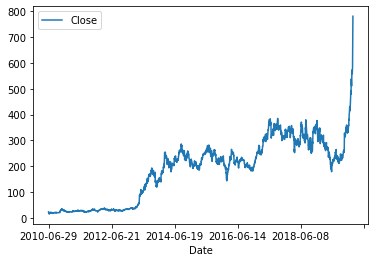

In [59]:
# Stock line data graph

plt.figure(figsize=(10, 10), dpi=80)

# figure(figsize=(10,8)) would create an inch-by-inch image, 
# which would be 80-by-80 pixels unless you also give a different dpi argument.

df.plot.line(x='Date',y='Close')
plt.show()

# Matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. 
# Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, 
# decorates the plot with labels, etc.



## <span style="color:orange"> 5. Implementing Rolling window 

Rolling-window analysis of a time-series model assesses:

- The stability of the model over time. A common time-series model assumption is that the coefficients are constant with respect to time. Checking for instability amounts to examining whether the coefficients are time-invariant.
- The forecast accuracy of the model.(predictive performance)

``dataframe.rolling() function:``
It provides the feature of rolling window calculations. The concept of rolling window calculation is most primarily used in signal processing and time series data. 

We take a window size of k at a time and perform some desired mathematical operation on it. A window of size k means k consecutive values at a time. In a very simple case all the ‘k’ values are equally weighted.

### <span style="color:purple"> What is moving average?

A moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set. In finance, a moving average (MA) is a stock indicator that is commonly used in technical analysis.

The moving average is calculated by adding a stock's prices over a certain period and dividing the sum by the total number of periods. For example, a trader wants to calculate the SMA for stock ABC by looking at the high of day over five periods

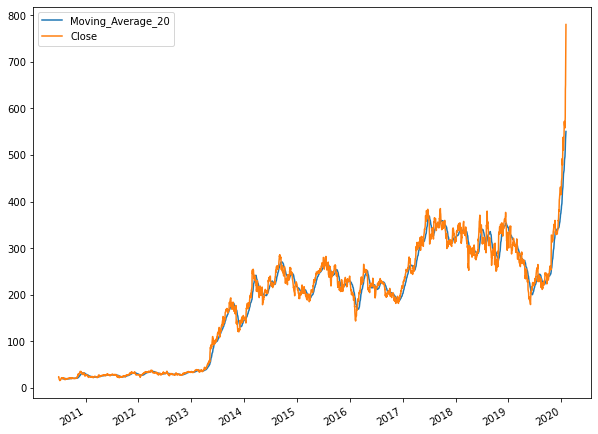

In [60]:
df['Moving_Average_8'] = df['Close'].rolling(8).mean()
df['Moving_Average_20'] = df['Close'].rolling(20).mean()
df['Moving_Average_50'] = df['Close'].rolling(50).mean()

# pandas creates subseries of all the different data contained within the window size defined- Then we 
# can cal a mean out of that- we nned a positional argument window: How big should the subseries be for 
# calculating the movinng avg- For eg, if its 5, each data point in the MA column calculated on subset 
# of 5

# By default pandas will use the outer value as the starting point- Thats the reason of missing values

#Plot the moving average
plt.figure(figsize=(10, 8))


df['Moving_Average_20'].plot(label='Moving_Average_20')
df['Close'].plot(label='Close')
plt.legend()
plt.show()



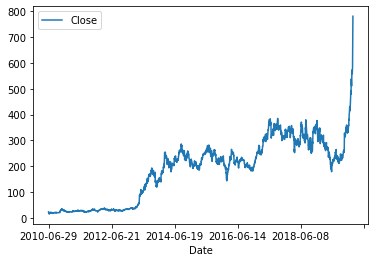

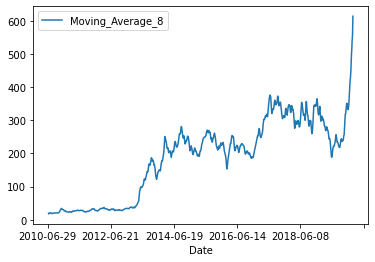

In [61]:
df.plot.line(x='Date',y='Close')
df.plot.line(x='Date',y='Moving_Average_8')
plt.legend()
plt.show()

We can see that the moving average smoothens out the variations of dataset- so we can ignore the variations
The above is a ten year chart of Tesla Stock from 2010 to 2020 with moving averages. The blue line is the shorter, a 20-day moving average. 
We can see there is a growing trend and a spike. 

We have calculated MA for last 8, 10 and 20 windows/days. It smoothes out the curve by Constantly updating the average price. We very unlikely for the trend to deviate outside the resistance point. 

In [62]:
df.Moving_Average_20= df.Moving_Average_20.fillna(0)
df.Moving_Average_50= df.Moving_Average_50.fillna(0)
df.Moving_Average_8= df.Moving_Average_8.fillna(0)

# Filling the NaN values in MA

In [63]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Moving_Average_8,Moving_Average_20,Moving_Average_50
2010-06-29,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,0.000000,0.000000,0.000000
2010-06-30,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,0.000000,0.000000,0.000000
2010-07-01,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,0.000000,0.000000,0.000000
2010-07-02,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,0.000000,0.000000,0.000000
2010-07-06,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2020-01-28,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,550.336258,503.125003,418.773402
2020-01-29,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,558.773758,511.439502,423.406202
2020-01-30,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,575.062508,522.563503,429.179001
2020-01-31,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,587.983757,533.579002,435.190602


### <span style="color:purple">Moving average wrt Stocks:
- A moving average (MA) is a stock indicator that is commonly used in technical analysis.
- The reason for calculating the moving average of a stock is to help smooth out the price data over a specified period of time by creating a constantly updated average price.
- By calculating the moving average, the impacts of random, short-term fluctuations on the price of a stock over a specified time-frame are mitigated.

MACD:
- The moving average convergence divergence (MACD) is used by traders to monitor the relationship between two moving averages. It is generally calculated by subtracting a 26-day exponential moving average from a 12-day exponential moving average.

- When the MACD is positive, the short-term average is located above the long-term average. This an indication of upward momentum. When the short-term average is below the long-term average, this is a sign that the momentum is downward. Many traders will also watch for a move above or below the zero line. A move above zero is a signal to buy, while a cross below zero is a signal to sell. 

Now let us create a MACD

In [64]:
df['MACD']=[1 if df.loc[i, 'Moving_Average_8']>df.loc[i, 'Moving_Average_20'] and df.loc[i, 'Moving_Average_50'] else 0
           for i in df.index]

# <span style="color:orange"> Building a trading strategy: Feature Engineering
Here we can try to answer questions we have- can we expect a profit ? Is investing going to be a risk ? 
How much are we going to gain of we invest continuously? What is the market strength of the stock?

## <span style="color:orange"> 1. Daily Returns

In general, stocks should have a high return and stabilty over time.There is more than 10% drop during certain years. In such cases, investors who are risk averse can better avoid this stock. 
In case they want to still invest, look into the long time ROI (cummulative returns). A correlation analysis with other stocks can also be done. Personal discretion and competitor stock analysis plays a role here, as its totally subjective.

## <span style="color:orange"> 2. Calculating the Price difference & Daily returns

In [65]:
df['Price Difference']= df['Close'].shift(-1)-df['Close']
print(df['Price Difference'])

2010-06-29     -0.059999
2010-06-30     -1.870001
2010-07-01     -2.759998
2010-07-02     -3.090000
2010-07-06     -0.310001
                 ...    
2020-01-28     14.089966
2020-01-29     59.820008
2020-01-30      9.760009
2020-01-31    129.429993
2020-02-03           NaN
Name: Price Difference, Length: 2416, dtype: float64


In [66]:
# Calculating Daily returns
df['Daily_Returns'] = df['Price Difference'] /df['Close']

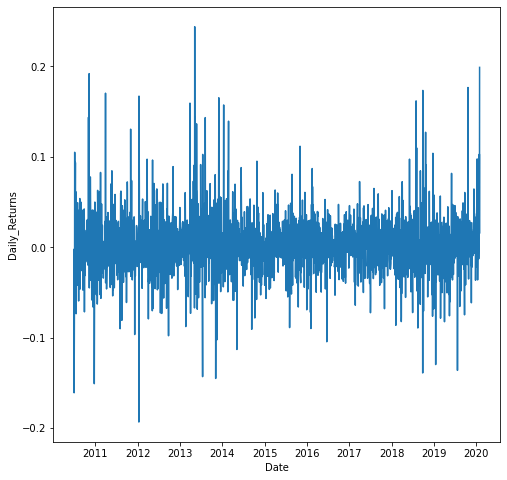

In [67]:
# df['Daily_Returns'].plot(xlabel='Date' ,ylabel='Daily_Returns')
import matplotlib.dates as mdates

fig,ax= plt.subplots(figsize=(8,8))

# plt.plot(df['Date'].tolist(),df['Daily_Returns'].tolist())

plt.plot(df.index, df['Daily_Returns'])
plt.ylabel('Daily_Returns')
plt.xlabel('Date')

plt.show()

# Looking into the daily returns

## <span style="color:orange"> 3. Profits

Profits are calculated as closing price of tomorrow- Closing price of today

In [68]:
# df['Close_Tomorrow']=df['Close'].shift(-1)
# df[['Close_Tomorrow','Close']]
# df['Profit']= [df.loc[i,'Close_Tomorrow']- df.loc[i, 'Close'] for i in df.index]
# df[['Close_Tomorrow','Close','Profit']]

# # print(df.loc[df.index[0], 'Close'])
# # print(df.loc[df.index[0],'Close_Tomorrow'])
# # print(df.loc[df.index[0],'MACD'])

# df['Profit'].plot()
# plt.axhline(y=0, color='red')

# Debugging

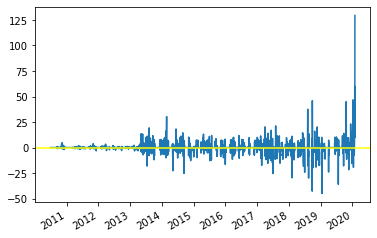

In [69]:
df['Close_Tomorrow']=df['Close'].shift(-1)
df['Profit']= [df.loc[i,'Close_Tomorrow']- df.loc[i, 'Close']
              if df.loc[i, 'MACD']== 1 else 0 for i in df.index]
df['Profit'].plot()
plt.axhline(y=0, color='yellow')

## <span style="color:orange"> 4. Investment Overtime

In [70]:
df['Investment_Returns_OT']= df['Profit'].cumsum()

In [71]:
df['Investment_Returns_OT'].tail()

2020-01-28    366.350151
2020-01-29    426.170159
2020-01-30    435.930168
2020-01-31    565.360161
2020-02-03           NaN
Name: Investment_Returns_OT, dtype: float64

Text(0.5, 1.0, 'Total money you have made: 565.3601609999998')

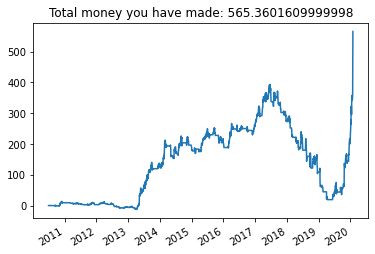

In [72]:
df['Investment_Returns_OT'].plot()
plt.title('Total money you have made: {}'.format(df.loc[df.index[-2], 'Investment_Returns_OT']))

From the above, we can get to know that we have a ROI of 565.36 dollars if we invested from 2010 to 2020. 
#### It would be wise to run this by other stocks and check it would be profitable overtime. 
The returns have gone done significantly from 2018 to 2020 during the pandemic. It has tremondously spiked only in 2020

## <span style="color:orange"> 5. Volume

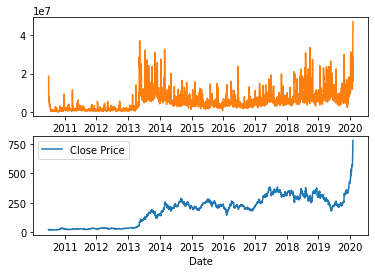

In [73]:
# plt.plot(df['Volume'])
# plt.axes([0.05,]) 

fig, axs= plt.subplots(2)
axs[0].plot(df.index,df['Volume'],'tab:orange', label='Volume')

axs[1].plot(df.index,df['Close'], label='Close Price')

plt.xlabel('Date')

plt.legend()
plt.show()

# tolist- Converts a column into list

From the above we can decipher how volume has affected the close price over the years. Initially when the volume of stocks were less, the close price is lesser too.

Volume can be an indicator of market strength, as rising markets on increasing volume are typically viewed as strong and healthy, which is what happened here

### How do we analyse Volume to gain profits

- ```Trend analysis and confirmation:```
A rising market should see rising volume. Buyers require increasing numbers and increasing enthusiasm in order to keep pushing prices higher. Increasing price and decreasing volume might suggest a lack of interest, and this is a warning of a potential reversal.A price drop (or rise) on large volume is a stronger signal that something in the stock has fundamentally changed.

When prices fall on increasing volume, the trend is gathering strength to the downside.
When prices reach new highs (or no lows) on decreasing volume, watch out; a reversal might be taking shape.

#### So I would suggest investing in this is not a bad idea based on Volume

# <span style="color:orange"> Deciding model to be built

Apart from understanding the above features that influence the stock analysis in helping whether we need to invest or not, it would be more helpful if we build a forecasting model that helps us understand clearly
Let us build 2 models:
<ol> <li> <span style="color:purple"> Forecasting Using ARIMA Model </span> </li>
<li> <span style="color:purple"> Predictive Analysis Using LSTM-RNN (Long Term Short Memory Model- Recurrent neural network) </span> </li> </ol>

## <span style="color:purple">1- Forecasting Using ARIMA Model

## <span style="color:orange"> Import data set for 'Tesla' and To compare it with 'Volkswagen'

In [212]:
symbol = ['VOW3.DE', 'TSLA']
source = 'yahoo'
start_date = '2010-06-29'
end_date = '2021-02-03'
stock = data.DataReader(symbol, source, start_date, end_date)

vw = stock.xs('VOW3.DE', level='Symbols', axis=1)
tesla = stock.xs('TSLA', level='Symbols', axis=1)

In [213]:
df=pd.read_csv('TSLA_arima.csv', index_col='Date', parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head(10)

Shape of data (2416, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-01-07,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-02-07,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-06-07,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
2010-08-07,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
2010-09-07,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
2010-12-07,17.950001,18.070000,17.000000,17.049999,17.049999,2202500


## <font color = orange> Plot graph for both 'Tesla' and 'Valkswagen'

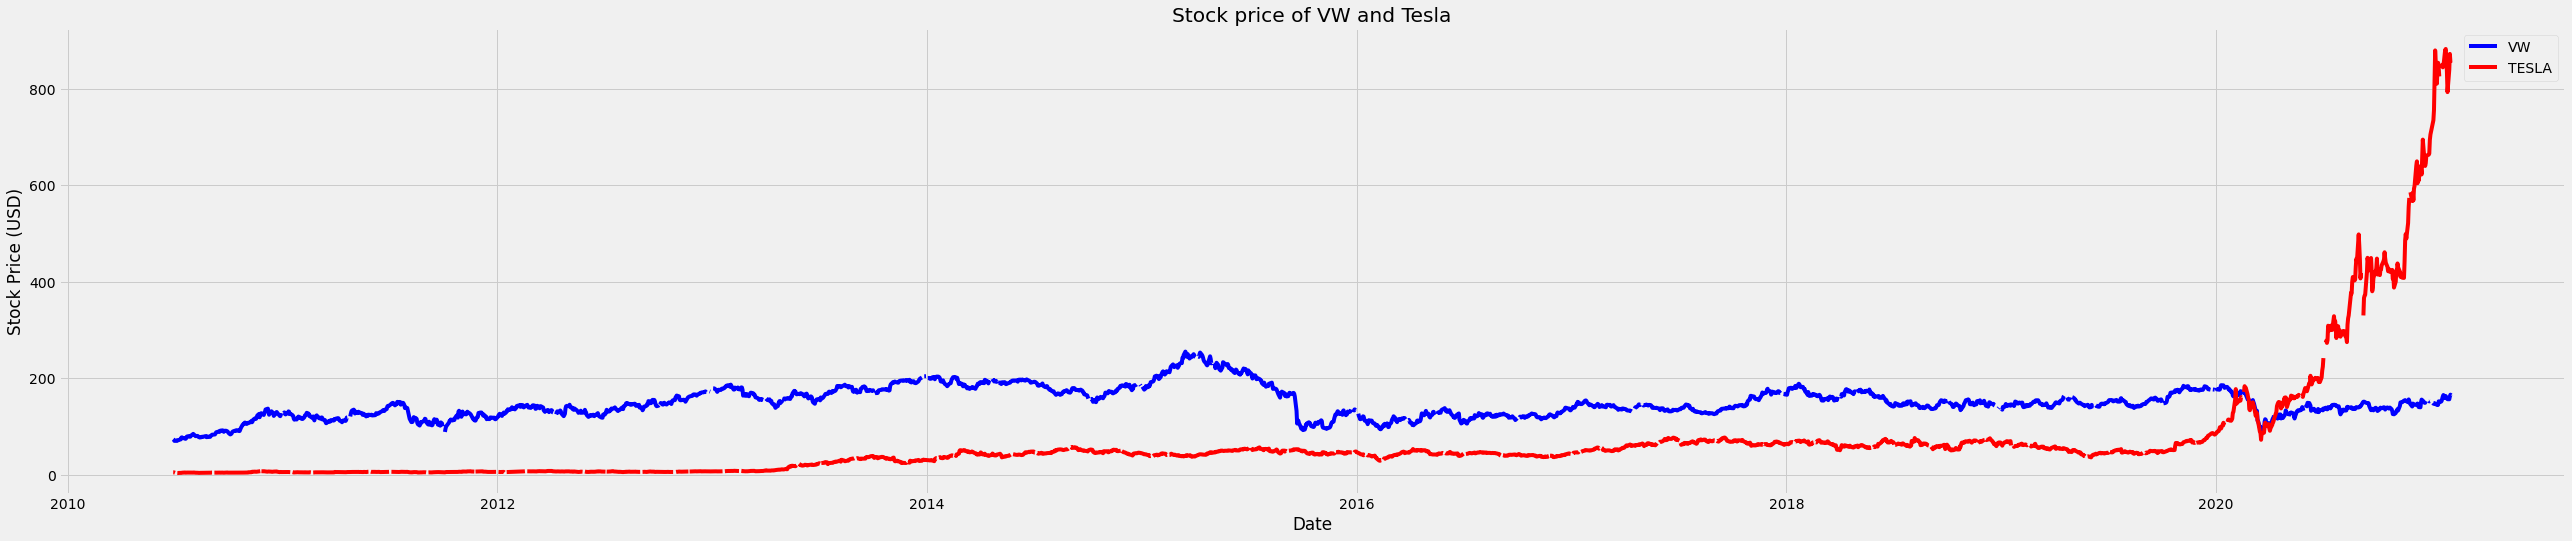

In [214]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.plot(x, y)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
rcParams['figure.figsize'] = 40, 8
plt.plot(vw.index, vw['Close'], 'b-', label = 'VW')
plt.plot(tesla.index, tesla['Close'], 'r-', label = 'TESLA')
plt.xlabel('Date'); plt.ylabel('Stock Price (USD)')
plt.title('Stock price of VW and Tesla')
plt.legend();

### <font color = dark >From above graph we can see that in 2020 Tesla took over the Valkswagen  but these are Tesla's adjusted prices as Tesle splitted from 1 share to 5 shares, else it took over the stock price of Valkswagen in 2015 only.  In 2020 it took over the Market Capitalization of the Valkswagen and reached to the second position after Genreal Moters.

## <font color = orange> Finding 'Missing Values' and Treating them for both 'Tesla' and 'Valkswagen'

In [215]:
print(f"""Tesla Missing Values: {tesla.isna().any(axis=1).sum()}\n{tesla[tesla.isna().any(axis=1)].index} \n
Volkswagen MissingaValues: {vw.isna().any(axis=1).sum()}\n{vw[vw.isna().any(axis=1)].index}""")

Tesla Missing Values: 70
DatetimeIndex(['2010-07-05', '2010-09-06', '2010-11-25', '2011-01-17',
               '2011-02-21', '2011-05-30', '2011-07-04', '2011-09-05',
               '2011-11-24', '2012-01-02', '2012-01-16', '2012-02-20',
               '2012-05-28', '2012-07-04', '2012-09-03', '2012-10-29',
               '2012-10-30', '2012-11-22', '2013-01-21', '2013-02-18',
               '2013-05-27', '2013-07-04', '2013-09-02', '2013-11-28',
               '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04',
               '2014-09-01', '2014-11-27', '2015-01-19', '2015-02-16',
               '2015-07-03', '2015-09-07', '2015-11-26', '2015-12-25',
               '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04',
               '2016-09-05', '2016-11-24', '2017-01-02', '2017-01-16',
               '2017-02-20', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2018-01-15', '2018-02-19', '2018-05-28',
               '2018-07-04', '2018-09-03', '2018-11-

In [216]:
def fill_missing(df):
    return df.fillna(method='ffill').fillna(method='bfill')

In [217]:
tesla, vw = fill_missing(tesla), fill_missing(vw)
print(f"""Tesla Missing Values: {tesla.isna().any(axis=1).sum()}
Volkswagen Missing Values: {vw.isna().any(axis=1).sum()}""")

Tesla Missing Values: 0
Volkswagen Missing Values: 0


In [218]:
tesla.head(10)

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-06-29,4.778,4.778,5.000,3.508,3.800,93831500.0
2010-06-30,4.766,4.766,6.084,4.660,5.158,85935500.0
2010-07-01,4.392,4.392,5.184,4.054,5.000,41094000.0
2010-07-02,3.840,3.840,4.620,3.742,4.600,25699000.0
2010-07-05,3.840,3.840,4.620,3.742,4.600,25699000.0
2010-07-06,3.222,3.222,4.000,3.166,4.000,34334500.0
2010-07-07,3.160,3.160,3.326,2.996,3.280,34608500.0
2010-07-08,3.492,3.492,3.504,3.114,3.228,38557000.0
2010-07-09,3.480,3.480,3.580,3.310,3.516,20253000.0


In [219]:
vw.head(10)

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-06-29,57.800720,73.430000,75.139999,72.809998,74.849998,1233377.0
2010-06-30,56.974213,72.379997,74.709999,72.220001,73.519997,1153137.0
2010-07-01,55.077171,69.970001,71.699997,69.970001,71.500000,1475203.0
2010-07-02,55.155884,70.070000,71.500000,70.000000,71.000000,704130.0
2010-07-05,55.100780,70.000000,70.849998,69.809998,70.470001,387599.0
2010-07-06,56.187054,71.379997,71.970001,70.589996,70.589996,665857.0
2010-07-07,56.076859,71.239998,71.650002,70.059998,70.449997,767184.0
2010-07-08,56.084717,71.250000,71.970001,70.849998,71.629997,756306.0
2010-07-09,56.769558,72.120003,72.440002,70.919998,71.250000,535715.0


## <font color = orange> Check the Time Series Components.

### <font color = dark > There are two types of Time series "Additive Time Series" and "Multiplicative Time Series". Our graph is not like Multiplicative Time Series, so let's Assume our Time Series as  Additive Time Series.

<font color = blue >There are Three components  of Time series.
 
  <font color = blue >1. Trend: the movement of the data on a larger scale (moving average)
      
  <font color = blue >2.Seasonality: repeated seasonal fluctuations
      
  <font color = blue >3.Residual: any fluctuations not captured from trend or seasonality (should be random)
      
<font color = blue >      Our Time Series Model we assumed Additive Time Series so it will add this three components.
      
<font color = blue >       Trend + Seasonality  + Residual.      

### <font color = dark > Let's again see the overall graph again and then  extract the three components of it.

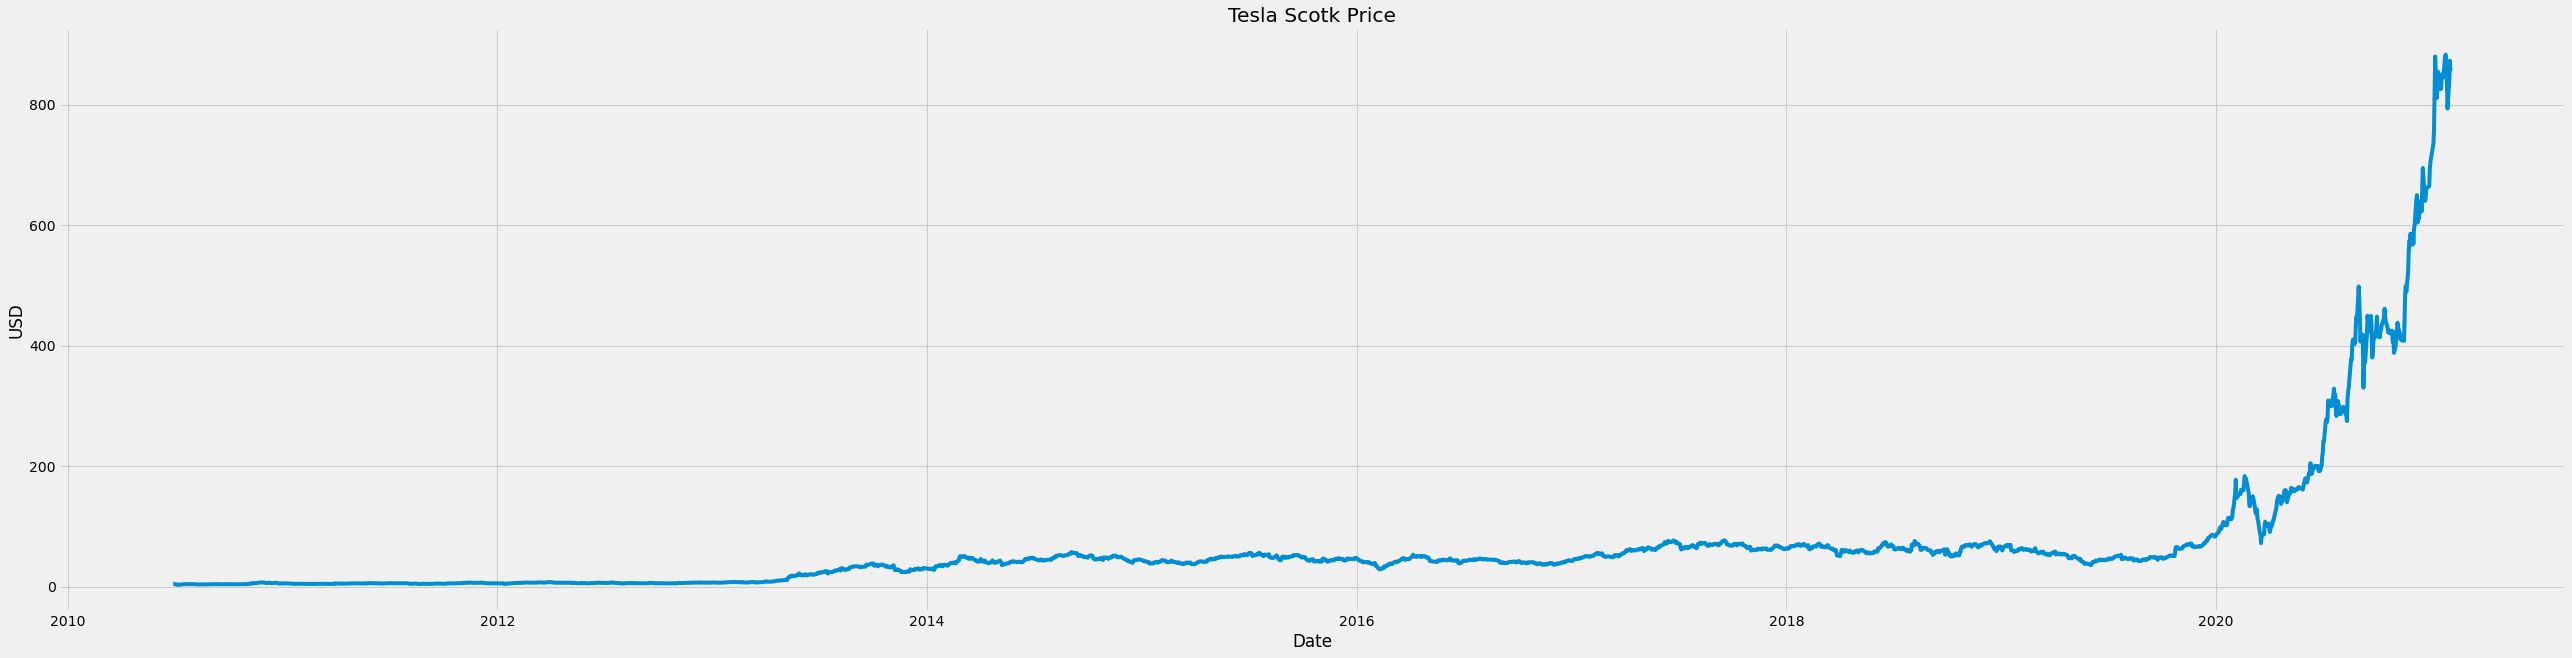

In [220]:
rcParams['figure.figsize'] = 40, 10
plot_df(tesla, tesla.index , tesla['Close'], title='Tesla Scotk Price',ylabel='USD')

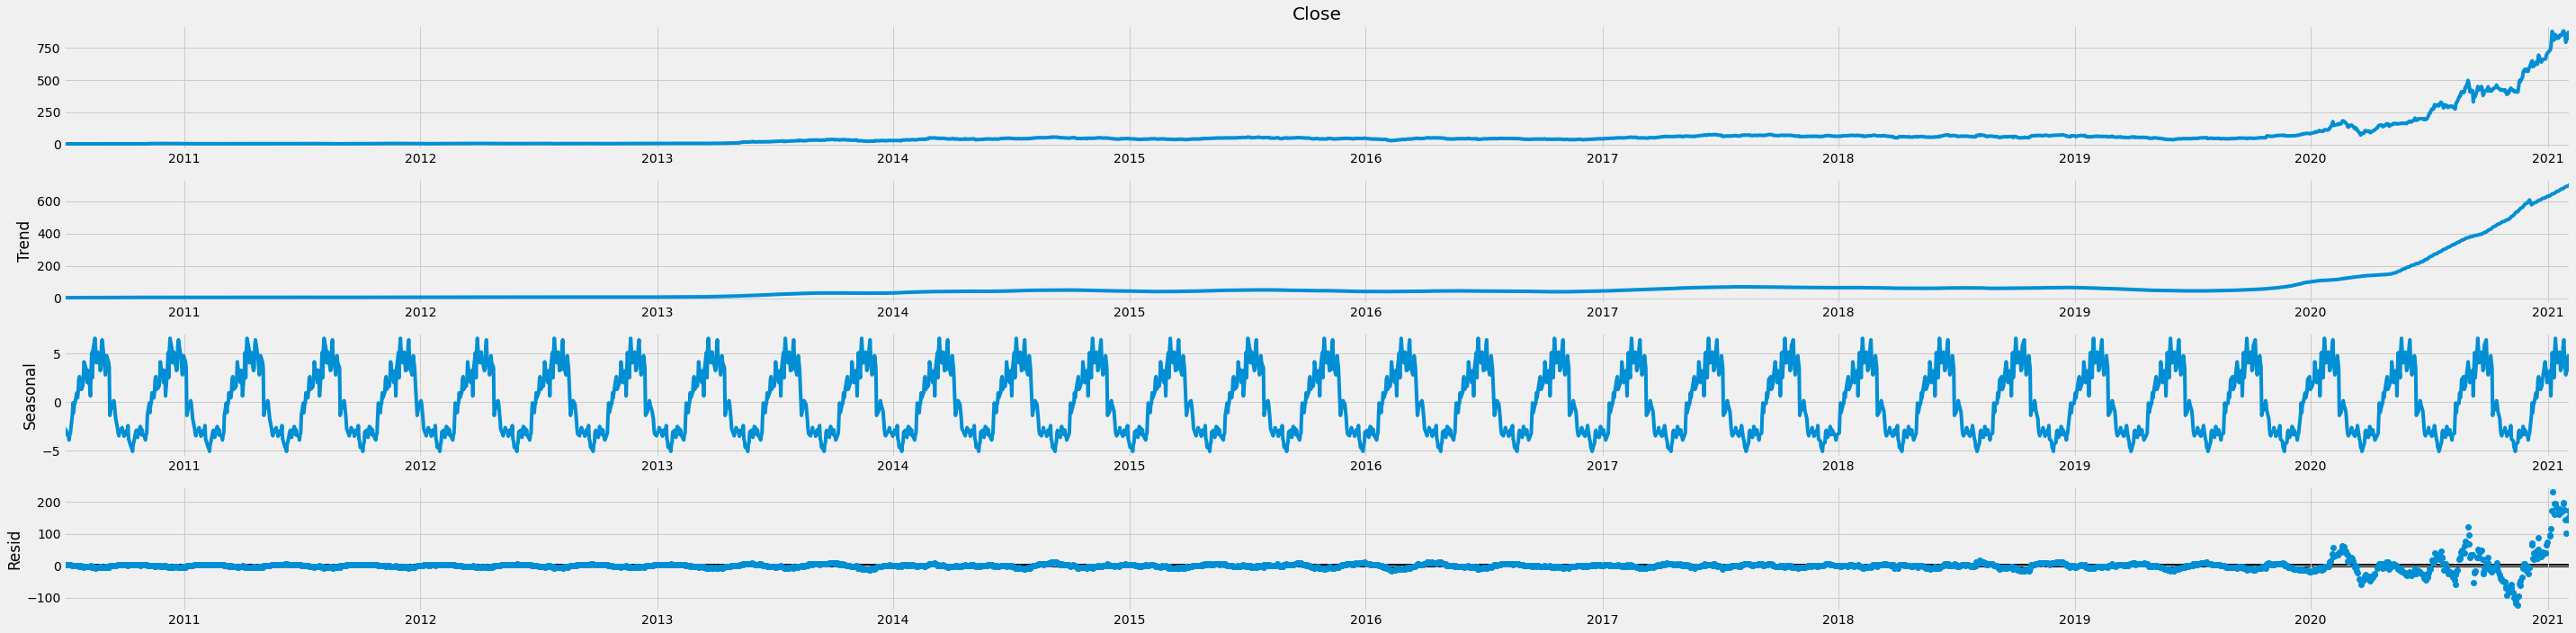

In [221]:
decomposition = sm.tsa.seasonal_decompose(tesla['Close'], model='additive', freq=7*4*3,extrapolate_trend='freq')
fig = decomposition.plot()
plt.show()

### <font color = dark > We can see above that Trend is smooth and pattern is in Seasonality this is the good  sighn else we need to try different combinations. (Here we used 7 * 4 * 3 combination.)

In [222]:
tesla_rc = pd.concat([decomposition.seasonal, decomposition.resid, decomposition.trend, decomposition.observed], axis=1)
tesla_rc.columns = ['seasonal', 'residual', 'trend', 'observation']
tesla_rc['total'] = tesla_rc['seasonal'] + tesla_rc['residual'] + tesla_rc['trend']
tesla_rc.head()

,seasonal,residual,trend,observation,total
Date,,,,,
2010-06-29,-2.523436,4.138202,3.163234,4.778,4.778
2010-06-30,-2.753384,4.336255,3.183129,4.766,4.766
2010-07-01,-3.362628,4.551604,3.203024,4.392,4.392
2010-07-02,-2.875951,3.493032,3.222919,3.840,3.840
2010-07-05,-3.431242,4.028428,3.242814,3.840,3.840


## <font color = orange>Check the Time Series is Stationary or Non-stationary.

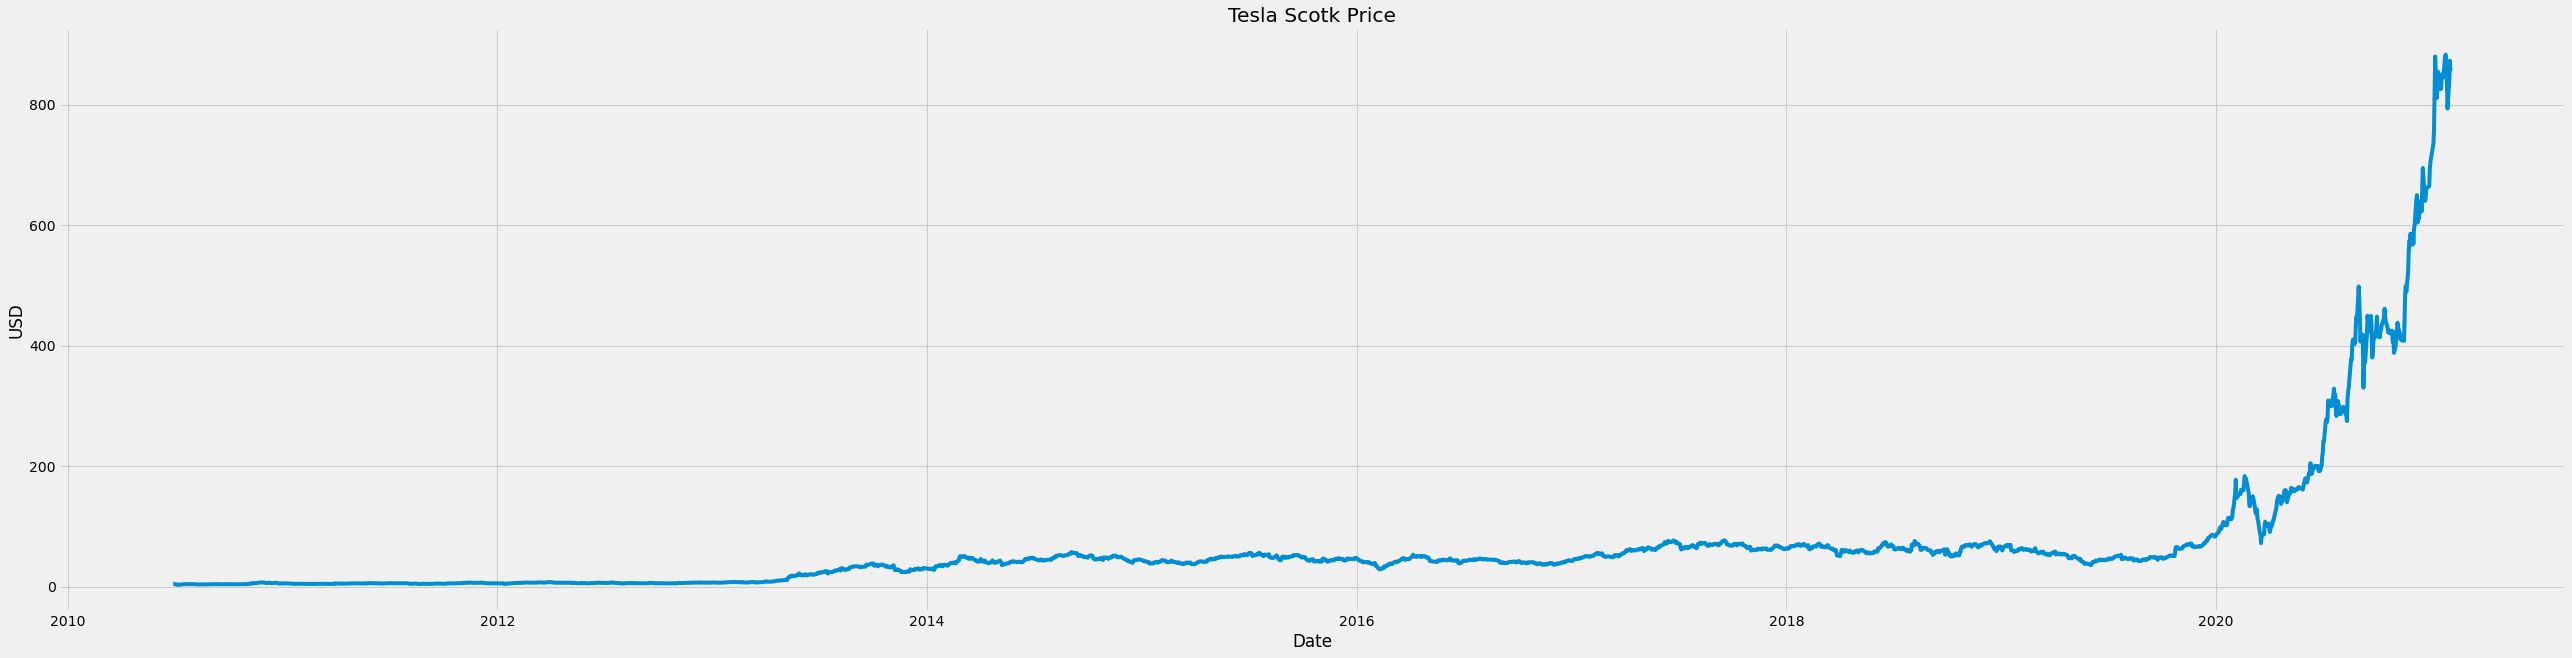

In [223]:
plot_df(tesla, tesla.index , tesla['Close'], title='Tesla Scotk Price',ylabel='USD')

In [224]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(tesla['Close'])
print(f"""
ADF Value : {adf_test[0]}
P Value : {adf_test[1]}
""")


ADF Value : 9.095638248788477
P Value : 1.0



### <font color = dark > When we do adfuller test our ADF Value shall be negative and the p-Value <0.05, but we are getting ADF Value positive and p-Value 1.0 which is >0.05 (much higher). So we can say that our data set is Non-stationary.

## <font color = orange>Change Time Series into Stationary

### <font color = dark > Log Transformation

In [225]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(np.log(tesla['Close']))
print(f"""
ADF Value : {adf_test[0]}
P Value : {adf_test[1]}
""")


ADF Value : 0.8425289463774092
P Value : 0.9922925548810414



### <font color = dark > Log Transformation is not enough as still ADF Value is positive and p-Value is too high, so lets do Differentiation

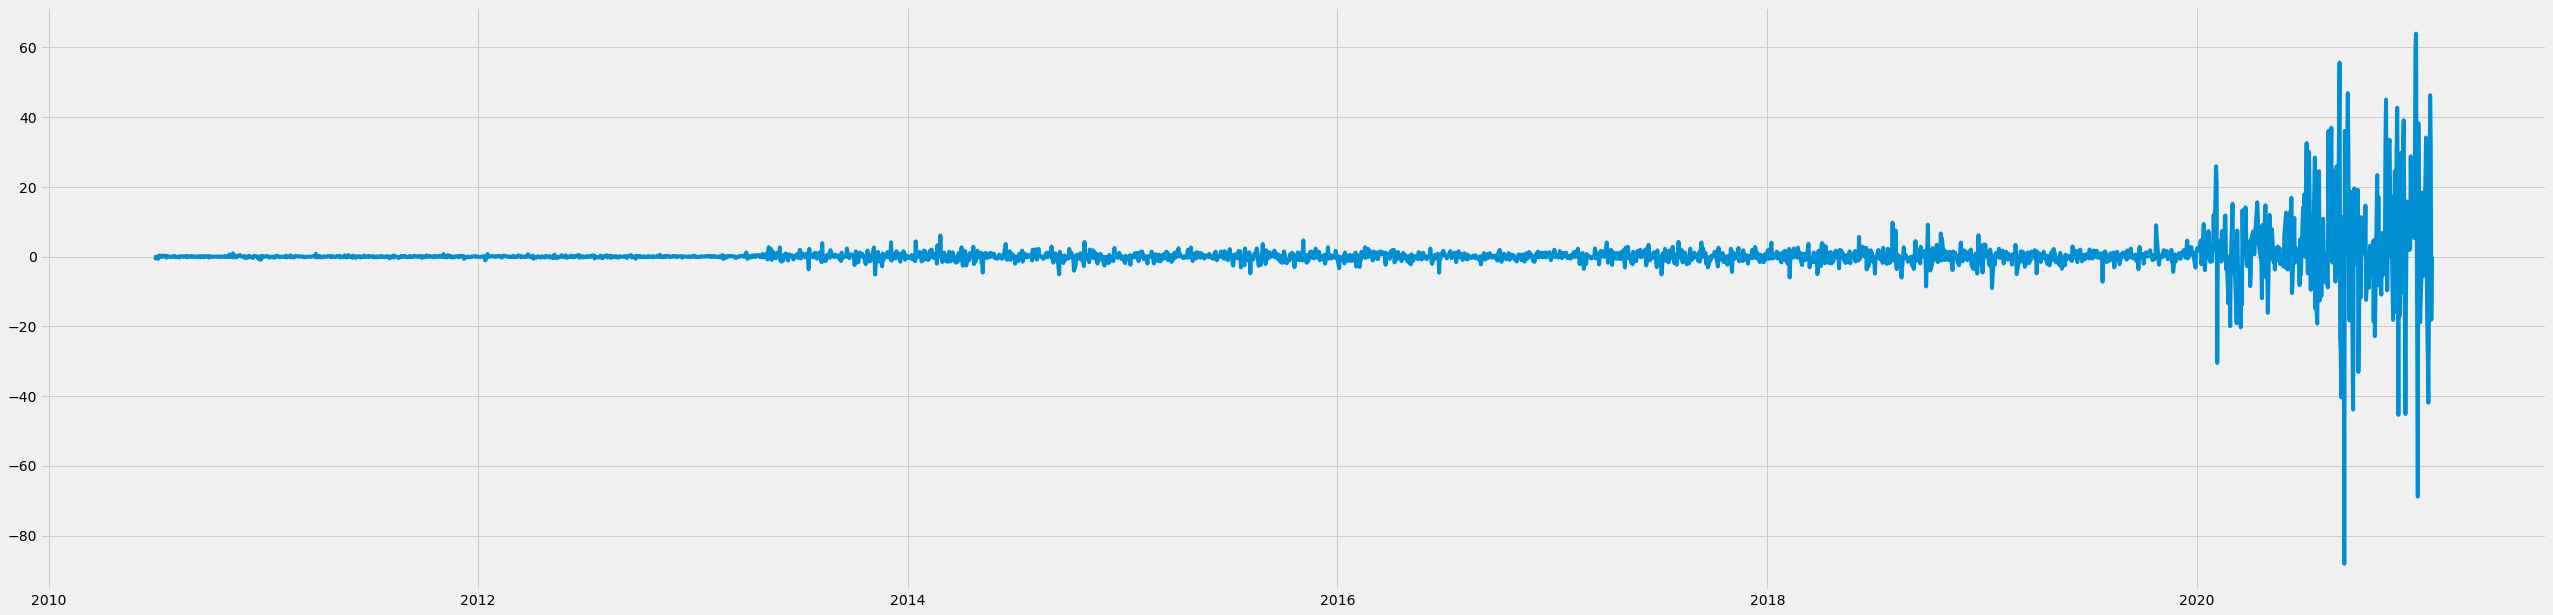

In [226]:
plt.plot(tesla['Close'].diff(1).fillna(0))

In [227]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(np.log(tesla['Close']).diff(1).fillna(0))
adf_test = adfuller((tesla['Close']).diff(1).fillna(0))
print(f"""
ADF Value : {adf_test[0]}
P Value : {adf_test[1]}
""")


ADF Value : -6.639258845051617
P Value : 5.46229458993005e-09



### <font color = dark > Now we can see after Differentiation ADF Value is negative and p-Value is too small  <0.05 so now the Time Series is Stationary.

In [228]:
tesla_st = tesla.diff(1).fillna(0)
tesla_st.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-06-29,0.000,0.000,0.000,0.000,0.000,0.0
2010-06-30,-0.012,-0.012,1.084,1.152,1.358,-7896000.0
2010-07-01,-0.374,-0.374,-0.900,-0.606,-0.158,-44841500.0
2010-07-02,-0.552,-0.552,-0.564,-0.312,-0.400,-15395000.0
2010-07-05,0.000,0.000,0.000,0.000,0.000,0.0


### <font color = dark > Above data set shows differentiated values, which are suitable for Time Series. The values are changed in the data set because we did the differentiation but we can solve that by using cumsum. Also we need to input initial data to transform as we changed previously nan, to zero.

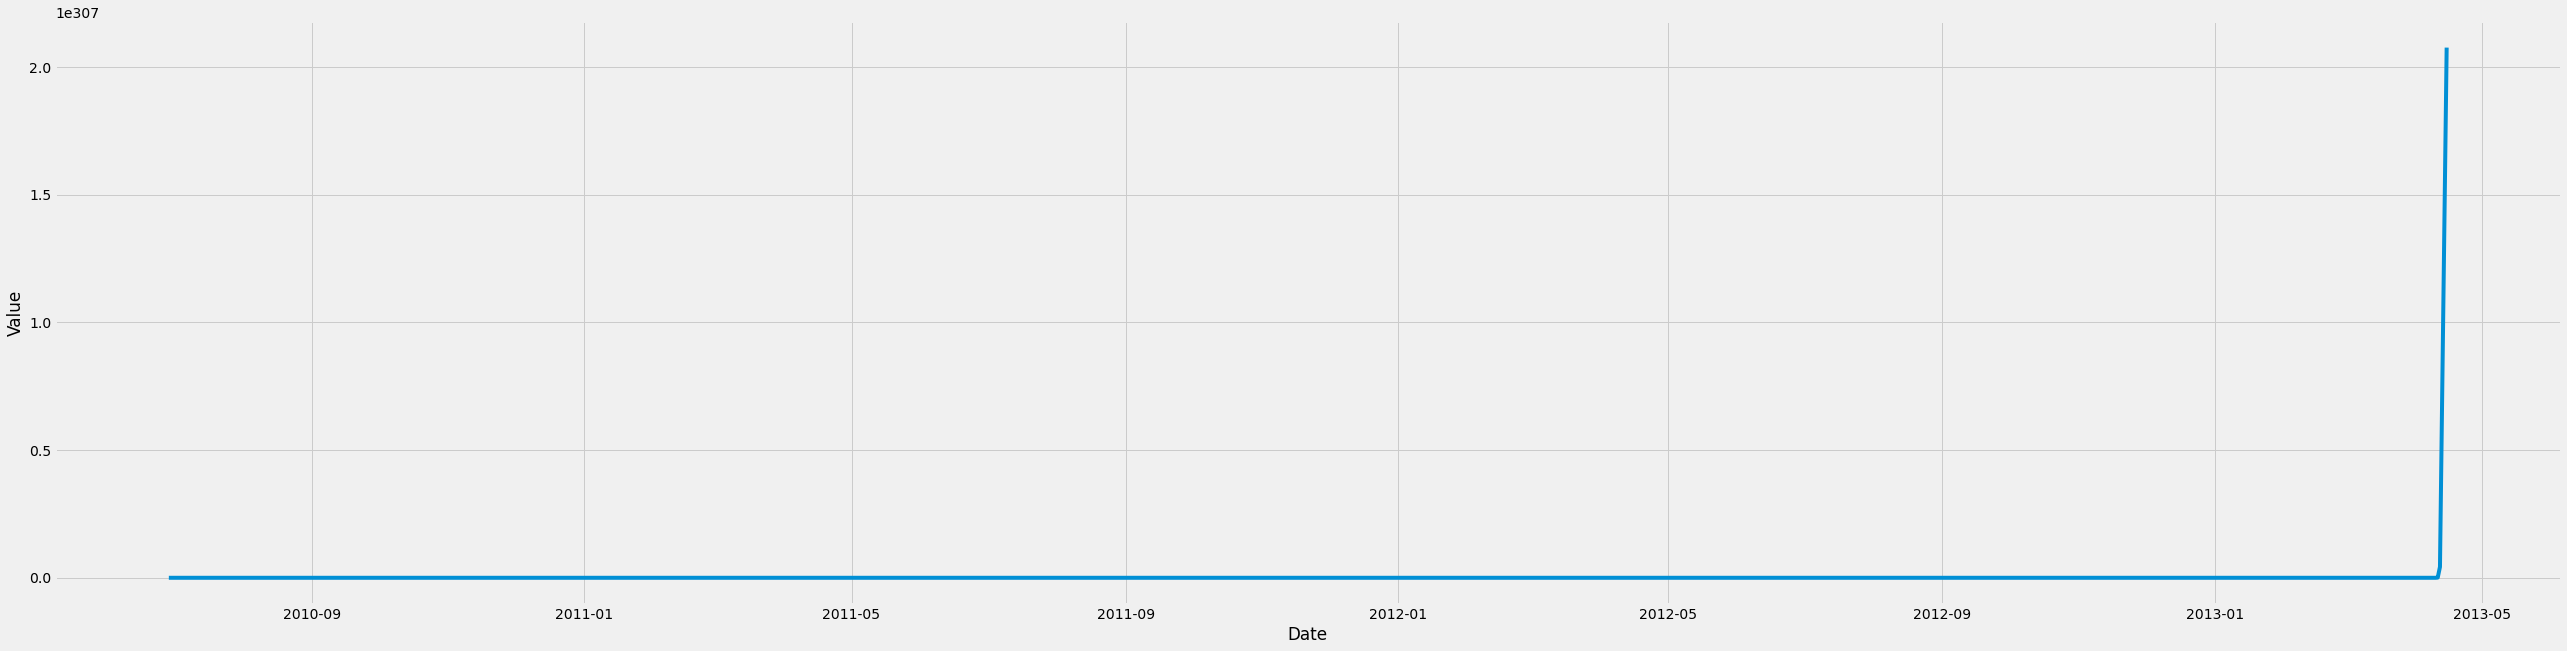

In [229]:
tesla_reconstruct = tesla_st.copy()
tesla_reconstruct = tesla_reconstruct.cumsum()
plot_df(tesla_reconstruct, tesla_reconstruct.index, tesla_reconstruct.cumsum().apply(np.exp)['Close'])

In [230]:
tesla_reconstruct = tesla_st.copy()
tesla_reconstruct.iloc[0,:] = tesla.iloc[0,:]
tesla_reconstruct = tesla_reconstruct.cumsum()

### <font color = dark > Now let's check  whether its the same with original data or not?

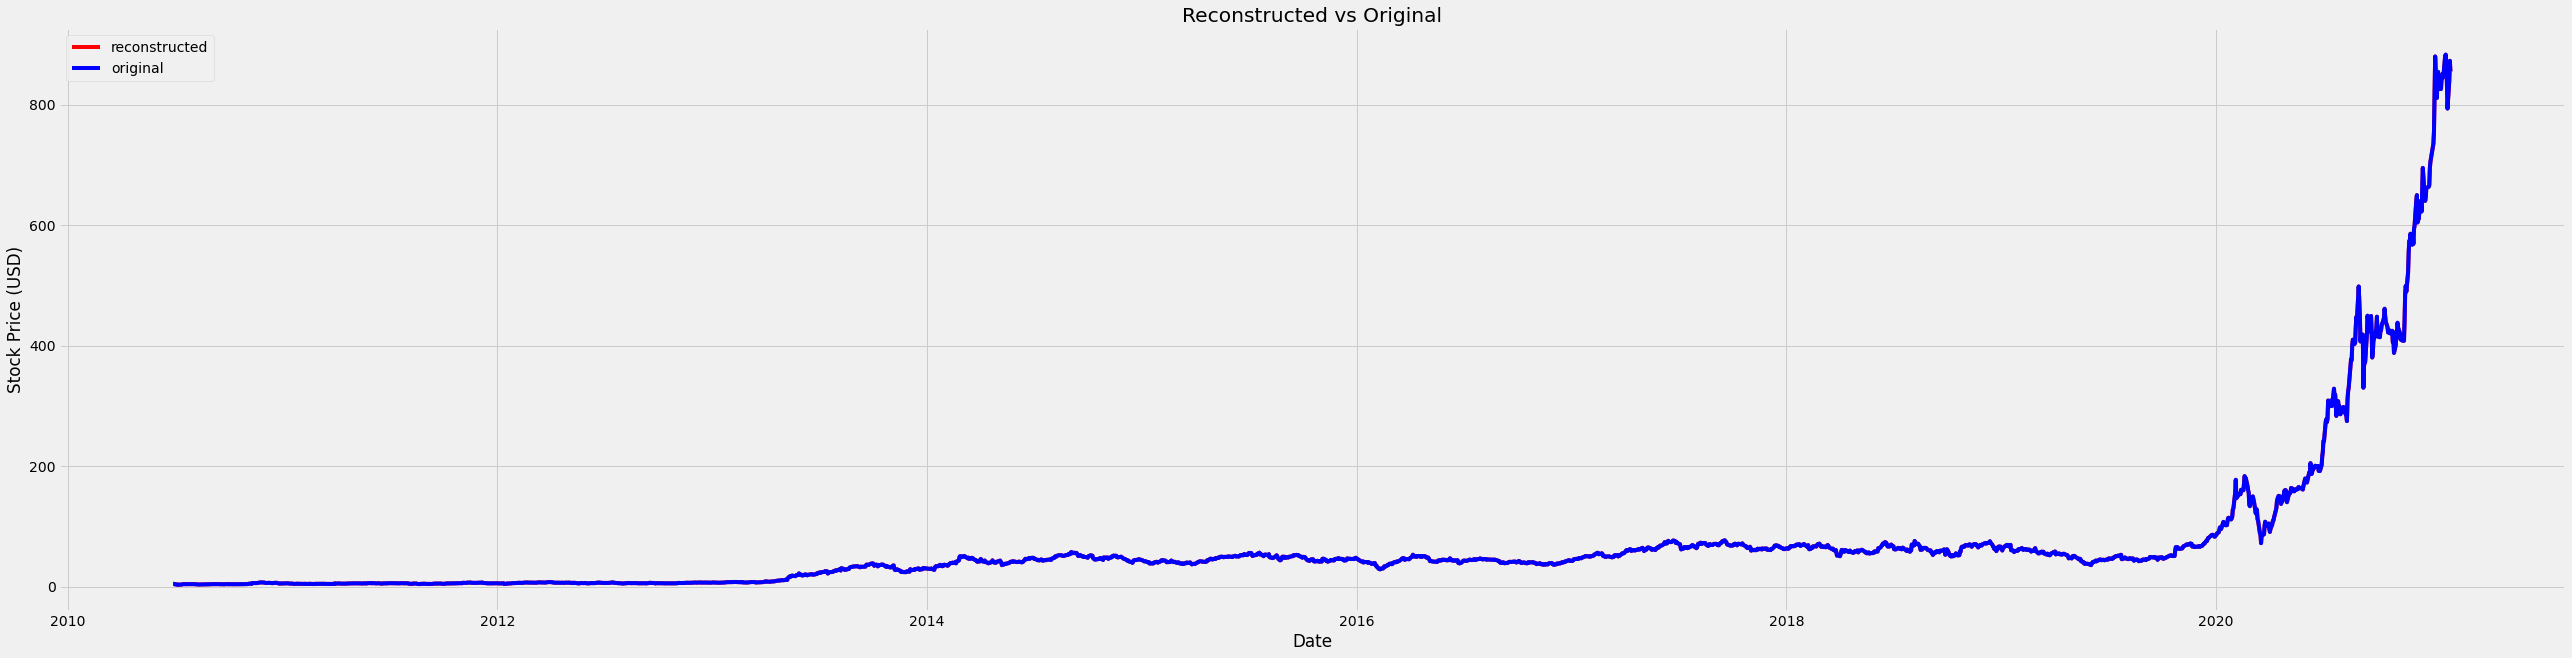

In [231]:
plt.plot(tesla.index, tesla_reconstruct['Close'], 'r-',  label='reconstructed')
plt.plot(tesla.index, tesla['Close'], 'b-', label = 'original')
plt.xlabel('Date'); plt.ylabel('Stock Price (USD)')
plt.title('Reconstructed vs Original')
plt.legend();

### <font color = dark > Based on the graph and manual check both data fream original and constructed are same so next step is to split the data set in to Training data set and Testing data set let's do it.

## <font color = orange>Step-08 Figure out order for ARIMA MODEL

In [232]:
stepwise_fit = auto_arima(tesla_reconstruct['Close'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=17310.048, Time=0.68 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=19358.182, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=18660.317, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=17346.412, Time=0.41 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=17304.677, Time=0.81 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=17339.068, Time=0.43 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=17305.925, Time=1.01 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=17306.503, Time=1.25 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=17308.081, Time=0.82 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=17336.071, Time=0.67 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=inf, Time=2.20 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=17304.801, Time=2.13 sec

Best model:  ARIMA(3,2,2)(0,0,0)[0] 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2739
Model:               SARIMAX(3, 2, 2)   Log Likelihood               -8646.338
Date:                Sun, 08 Aug 2021   AIC                          17304.677
Time:                        12:39:38   BIC                          17340.164
Sample:                             0   HQIC                         17317.501
                               - 2739                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9920      0.007   -140.947      0.000      -1.006      -0.978
ar.L2         -0.1463      0.006    -23.622      0.000      -0.158      -0.134
ar.L3         -0.0549      0.006     -8.854      0.000      -0.067      -0.043
ma.L1         -0.0259      0.005     -4.791      0.000      -0.036      -0.015
ma.L2         -0.9511      0.005   -177.551      0.000      -0.962      -0.941
sigma2        32.4168      0.170    190.272      0.000      32.083      32.751
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            365646.44
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):             309.32   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        59.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## <font color = orange> Split the data set into Training data set and Testing data set.

### <font color = dark>Note: In stock Market 9 days for short, 50 days for medium and 100 days for long term moving average taken in to consideration so we are taking testing data set as 100 and we will see the graph by keeping it 50 also.

In [233]:
tesla_reconstruct.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-06-29,4.778,4.778,5.000,3.508,3.800,93831500.0
2010-06-30,4.766,4.766,6.084,4.660,5.158,85935500.0
2010-07-01,4.392,4.392,5.184,4.054,5.000,41094000.0
2010-07-02,3.840,3.840,4.620,3.742,4.600,25699000.0
2010-07-05,3.840,3.840,4.620,3.742,4.600,25699000.0


In [234]:
print('Shape of data',tesla_reconstruct.shape)

Shape of data (2739, 6)


In [235]:
print(tesla_reconstruct.shape)
train=tesla_reconstruct.iloc[:-100]
test=tesla_reconstruct.iloc[-100:]
print(train.shape,test.shape)

(2739, 6)
(2639, 6) (100, 6)


## <font color = orange> Train the Model.

In [236]:
model=ARIMA(train['Close'], order= (3,2,2))
model= model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Close   No. Observations:                 2637
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -7275.947
Method:                       css-mle   S.D. of innovations              3.817
Date:                Sun, 08 Aug 2021   AIC                          14565.894
Time:                        12:39:40   BIC                          14607.035
Sample:                             2   HQIC                         14580.790
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0009      0.001      1.240      0.215      -0.001       0.002
ar.L1.D2.Close    -0.7787      0.062    -12.566      0.000      -0.900      -0.657
ar.L2.D2.Close    -0.0351      0.026     -1.324      0.186      -0.087       0.017
ar.L3.D2.Close     0.1449      0.027      5.410      0.000       0.092       0.197
ma.L1.D2.Close    -0.2129      0.062     -3.451      0.001      -0.334      -0.092
ma.L2.D2.Close    -0.7714      0.061    -12.675      0.000      -0.891      -0.652
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3326           -0.7734j            1.5408           -0.4163
AR.2           -1.3326           +0.7734j            1.5408            0.4163
AR.3            2.9073           -0.0000j            2.9073           -0.0000
MA.1            1.0089           +0.0000j            1.0089            0.0000
MA.2           -1.2849           +0.0000j            1.2849            0.5000
-----------------------------------------------------------------------------
"""

## <font color = orange> Test the model on Testing data set "test"

In [237]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=tesla.index[start:end+1]
print(pred)

Date
2020-09-16    457.889297
2020-09-17    461.183749
2020-09-18    466.588390
2020-09-21    467.331865
2020-09-22    470.932065
                 ...    
2021-01-29    686.654321
2021-02-01    689.071128
2021-02-02    691.488858
2021-02-03    693.907511
2021-02-04    696.327086
Length: 100, dtype: float64


<AxesSubplot:xlabel='Date'>

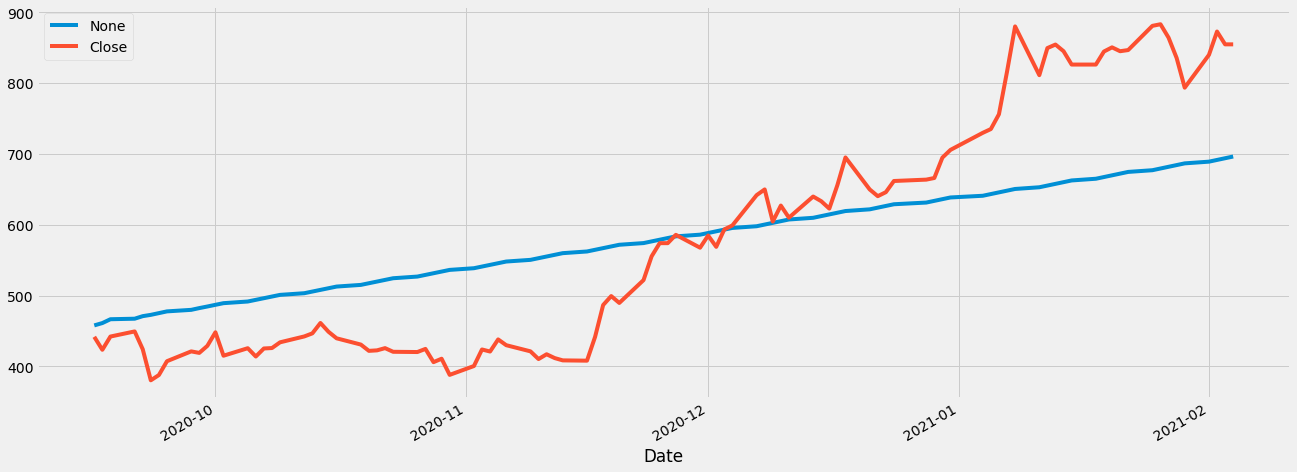

In [238]:
pred.plot(legend=True)
test['Close'].plot(legend=True, figsize=(20,8))

### <font color = dark>Let's repeat the step 9,10 and 11 for 50 days also 

In [239]:
tesla_reconstruct.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-06-29,4.778,4.778,5.000,3.508,3.800,93831500.0
2010-06-30,4.766,4.766,6.084,4.660,5.158,85935500.0
2010-07-01,4.392,4.392,5.184,4.054,5.000,41094000.0
2010-07-02,3.840,3.840,4.620,3.742,4.600,25699000.0
2010-07-05,3.840,3.840,4.620,3.742,4.600,25699000.0


In [240]:
print('Shape of data',tesla_reconstruct.shape)

Shape of data (2739, 6)


In [241]:
print(tesla_reconstruct.shape)
train=tesla_reconstruct.iloc[:-50]
test=tesla_reconstruct.iloc[-50:]
print(train.shape,test.shape)

(2739, 6)
(2689, 6) (50, 6)


In [242]:
model=ARIMA(train['Close'], order= (3,2,2))
model= model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Close   No. Observations:                 2687
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -7816.866
Method:                       css-mle   S.D. of innovations              4.434
Date:                Sun, 08 Aug 2021   AIC                          15647.733
Time:                        12:39:58   BIC                          15689.006
Sample:                             2   HQIC                         15662.662
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0009      0.001      1.302      0.193      -0.000       0.002
ar.L1.D2.Close    -0.8649      0.030    -28.940      0.000      -0.923      -0.806
ar.L2.D2.Close    -0.0549      0.026     -2.088      0.037      -0.106      -0.003
ar.L3.D2.Close     0.0447      0.022      2.032      0.042       0.002       0.088
ma.L1.D2.Close    -0.0906      0.023     -3.909      0.000      -0.136      -0.045
ma.L2.D2.Close    -0.8957      0.023    -39.121      0.000      -0.941      -0.851
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4442           +0.0000j            1.4442            0.5000
AR.2           -2.8206           +0.0000j            2.8206            0.5000
AR.3            5.4927           +0.0000j            5.4927            0.0000
MA.1            1.0072           +0.0000j            1.0072            0.0000
MA.2           -1.1084           +0.0000j            1.1084            0.5000
-----------------------------------------------------------------------------
"""

In [243]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=tesla.index[start:end+1]
print(pred)

Date
2020-11-25    553.794264
2020-11-26    558.930310
2020-11-27    560.239125
2020-11-30    562.921394
2020-12-01    564.927853
2020-12-02    567.274026
2020-12-03    569.426483
2020-12-04    571.699271
2020-12-07    573.895431
2020-12-08    576.144238
2020-12-09    578.358725
2020-12-10    580.598213
2020-12-11    582.821947
2020-12-14    585.058033
2020-12-15    587.287050
2020-12-16    589.522431
2020-12-17    591.754880
2020-12-18    593.990832
2020-12-21    596.225832
2020-12-22    598.462965
2020-12-23    600.700094
2020-12-24    602.938698
2020-12-28    605.177754
2020-12-29    607.417971
2020-12-30    609.658857
2020-12-31    611.900753
2021-01-04    614.143423
2021-01-05    616.387030
2021-01-06    618.631462
2021-01-07    620.876796
2021-01-08    623.122978
2021-01-11    625.370046
2021-01-12    627.617974
2021-01-13    629.866780
2021-01-14    632.116451
2021-01-15    634.366997
2021-01-18    636.618410
2021-01-19    638.870695
2021-01-20    641.123850
2021-01-21    643.37

<AxesSubplot:xlabel='Date'>

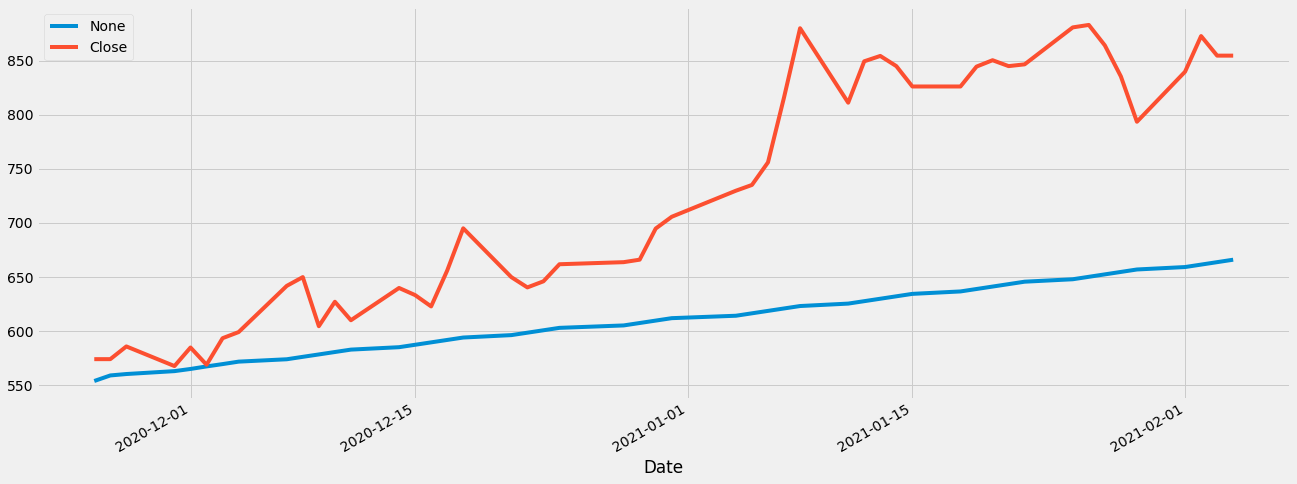

In [244]:
pred.plot(legend=True)
test['Close'].plot(legend=True, figsize=(20,8))

In [256]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print(tesla.iloc[start:end+1]['Close'].mean())
rmse=sqrt(mean_squared_error(pred,tesla.iloc[start:end+1]['Close']))
print(rmse)

727.0053991699219
141.00128715909202


<font color = dark> First we check the mean value of the test set which comes out to be 727.00. And the root mean squared error for this particular model should come to around 141.00128. Also you should care about is that your root mean squared should be very smaller than the mean value of test set. In this case we can see 
    
#### <font color = dark> The average error is gonna be roughly (141.00128/727.00539)*100 = 19.39% of the actual value.

## <font color = orange> Conclusion of ARIMA Model

### <font color = dark>We can see that 100 days moving average gives us more clear idea about the stock movement and long term trend.  here we can predict that due to covid it was traded below the prediction line in 2020 September to December Quarter but once vaccine rolled out and global sentiment became positive in Deciember 2020 it crossed the prediction line and since then it above the prediction (Means performed batter than its average) in December 2020 and Jan 2021.  Moreover it's trend line (direction of the prediction line) is in upward direction so it is still a good stock to invest. But as it is above the prediction line we can say that it is a bit costly compared to the overall expectation of our model. 

## <font color = orange>Future Price Prediction from February 2021 to July 2021

### <font color = dark>Here we will do the same exercise but we will keep training dataset  as our complete data set and Testing with the values from Feb 2021 to July 2021 all will be in this one step just to see the prediction line with the actual.

In [136]:
symbol = ['TSLA']
source = 'yahoo'
start_date = '2010-06-29'
end_date = '2021-07-20'
stock = data.DataReader(symbol, source, start_date, end_date)
tesla = stock.xs('TSLA', level='Symbols', axis=1)

In [137]:
df=pd.read_csv('TSLA_arima.csv', index_col='Date', parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head(10)

Shape of data (2416, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-01-07,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-02-07,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-06-07,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
2010-08-07,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
2010-09-07,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
2010-12-07,17.950001,18.070000,17.000000,17.049999,17.049999,2202500


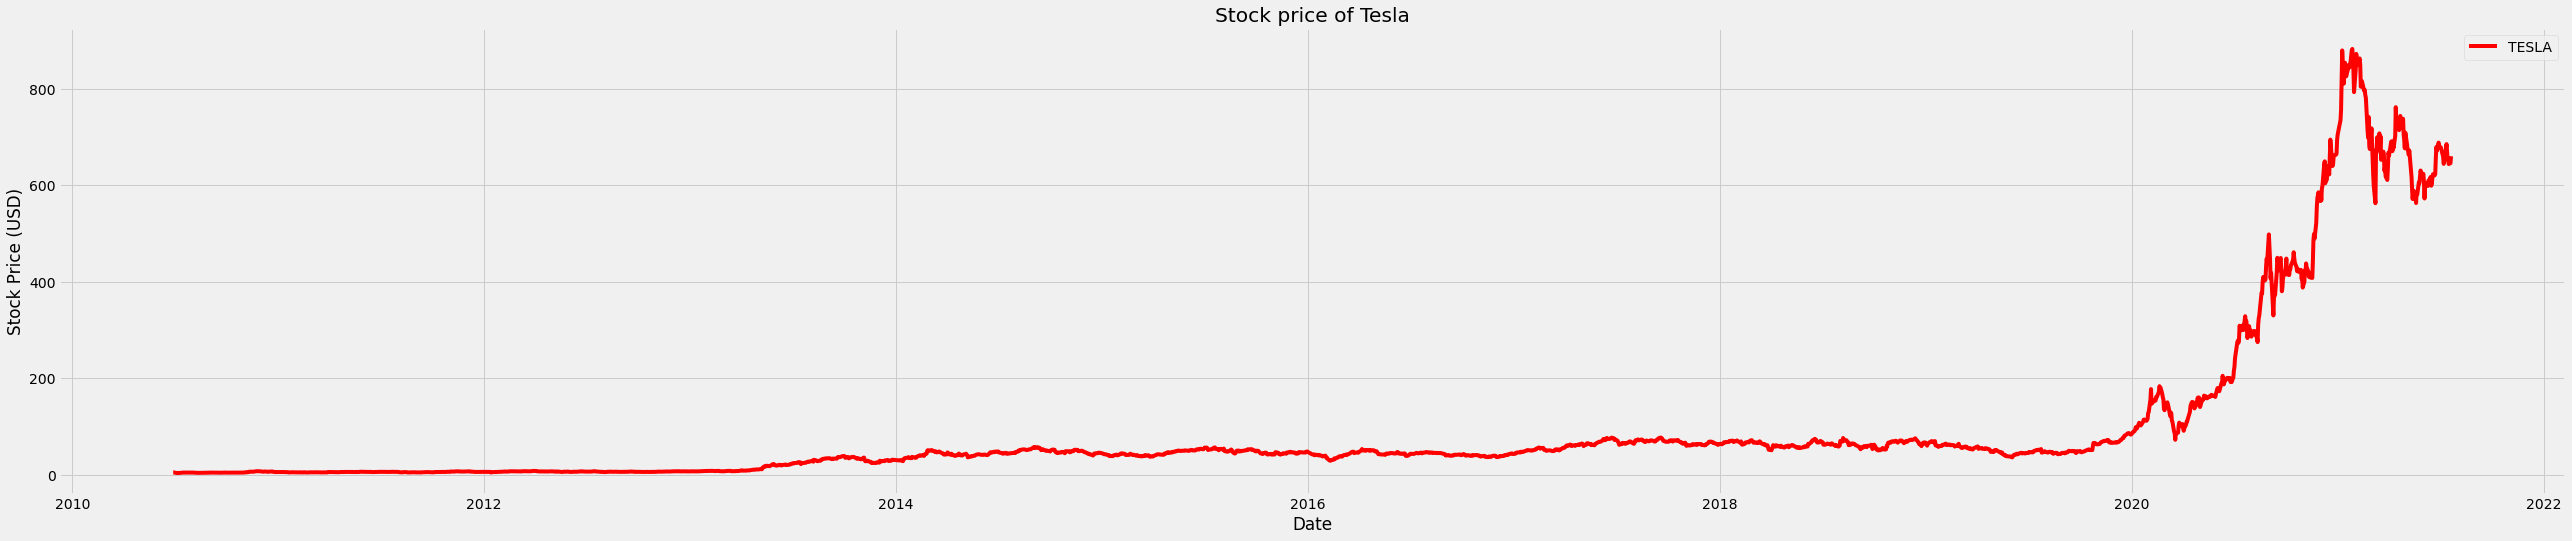

In [138]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.plot(x, y)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
rcParams['figure.figsize'] = 40, 8
plt.plot(tesla.index, tesla['Close'], 'r-', label = 'TESLA')
plt.xlabel('Date'); plt.ylabel('Stock Price (USD)')
plt.title('Stock price of Tesla')
plt.legend();

In [139]:
print(f"""Tesla Missing Values: {tesla.isna().any(axis=1).sum()}\n{tesla[tesla.isna().any(axis=1)].index}""")

Tesla Missing Values: 0
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


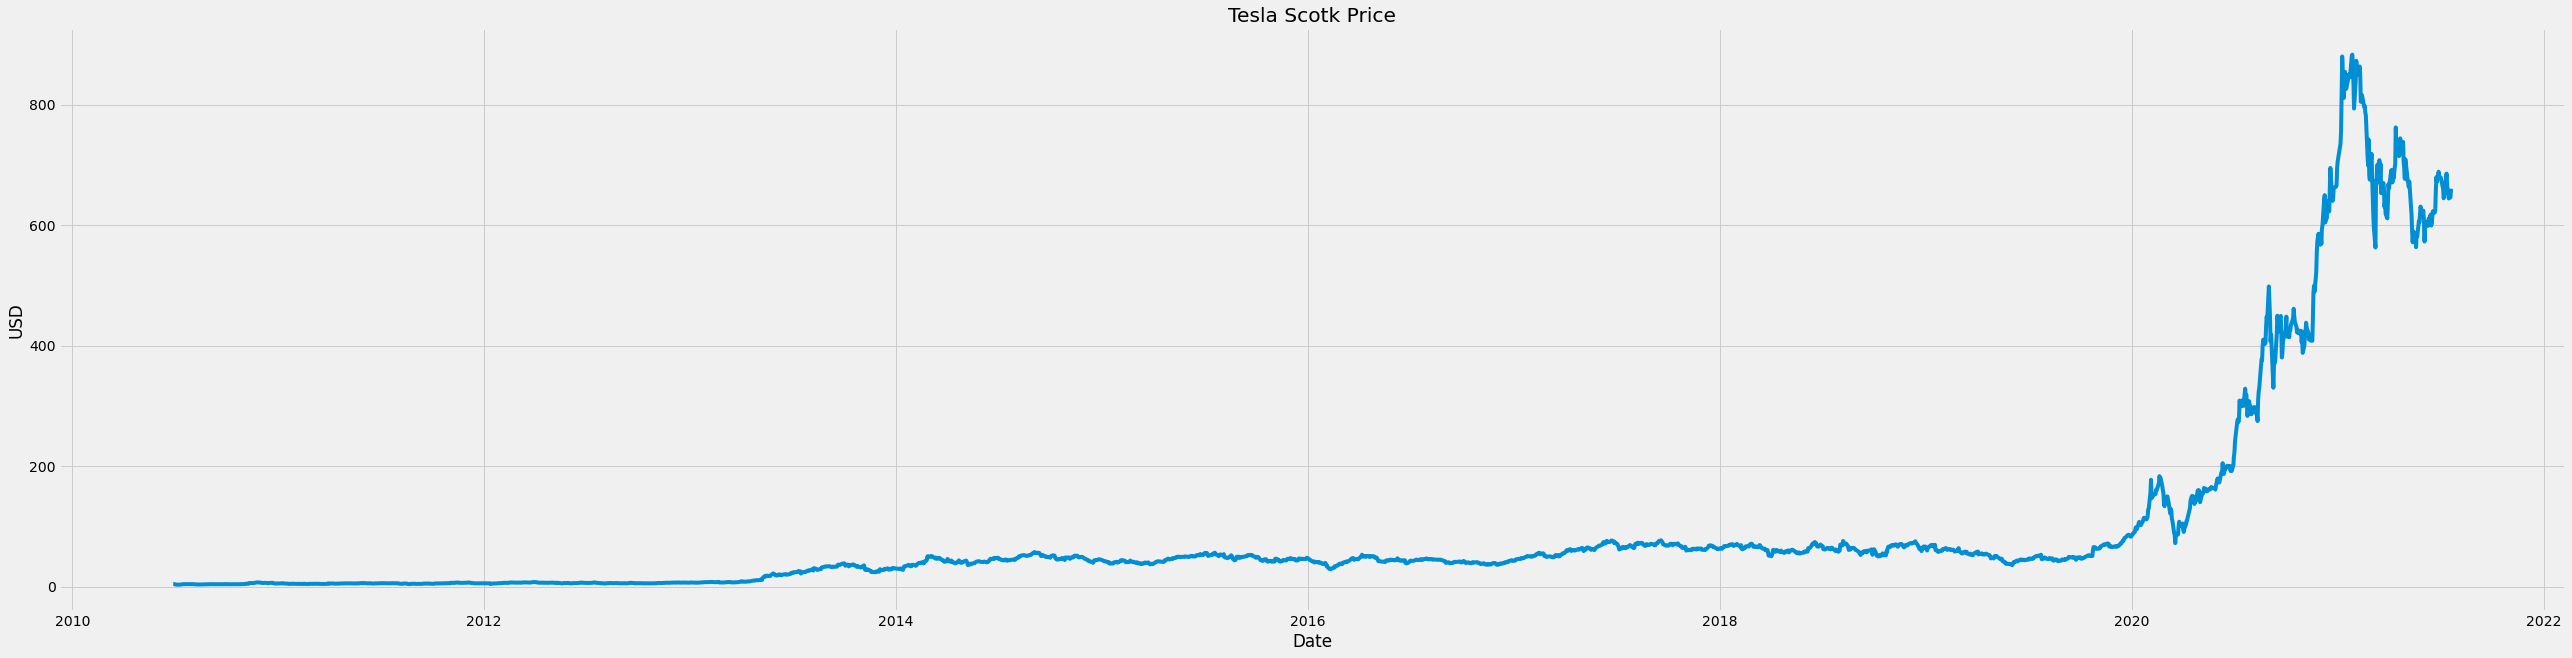

In [140]:
rcParams['figure.figsize'] = 40, 10
plot_df(tesla, tesla.index , tesla['Close'], title='Tesla Scotk Price',ylabel='USD')

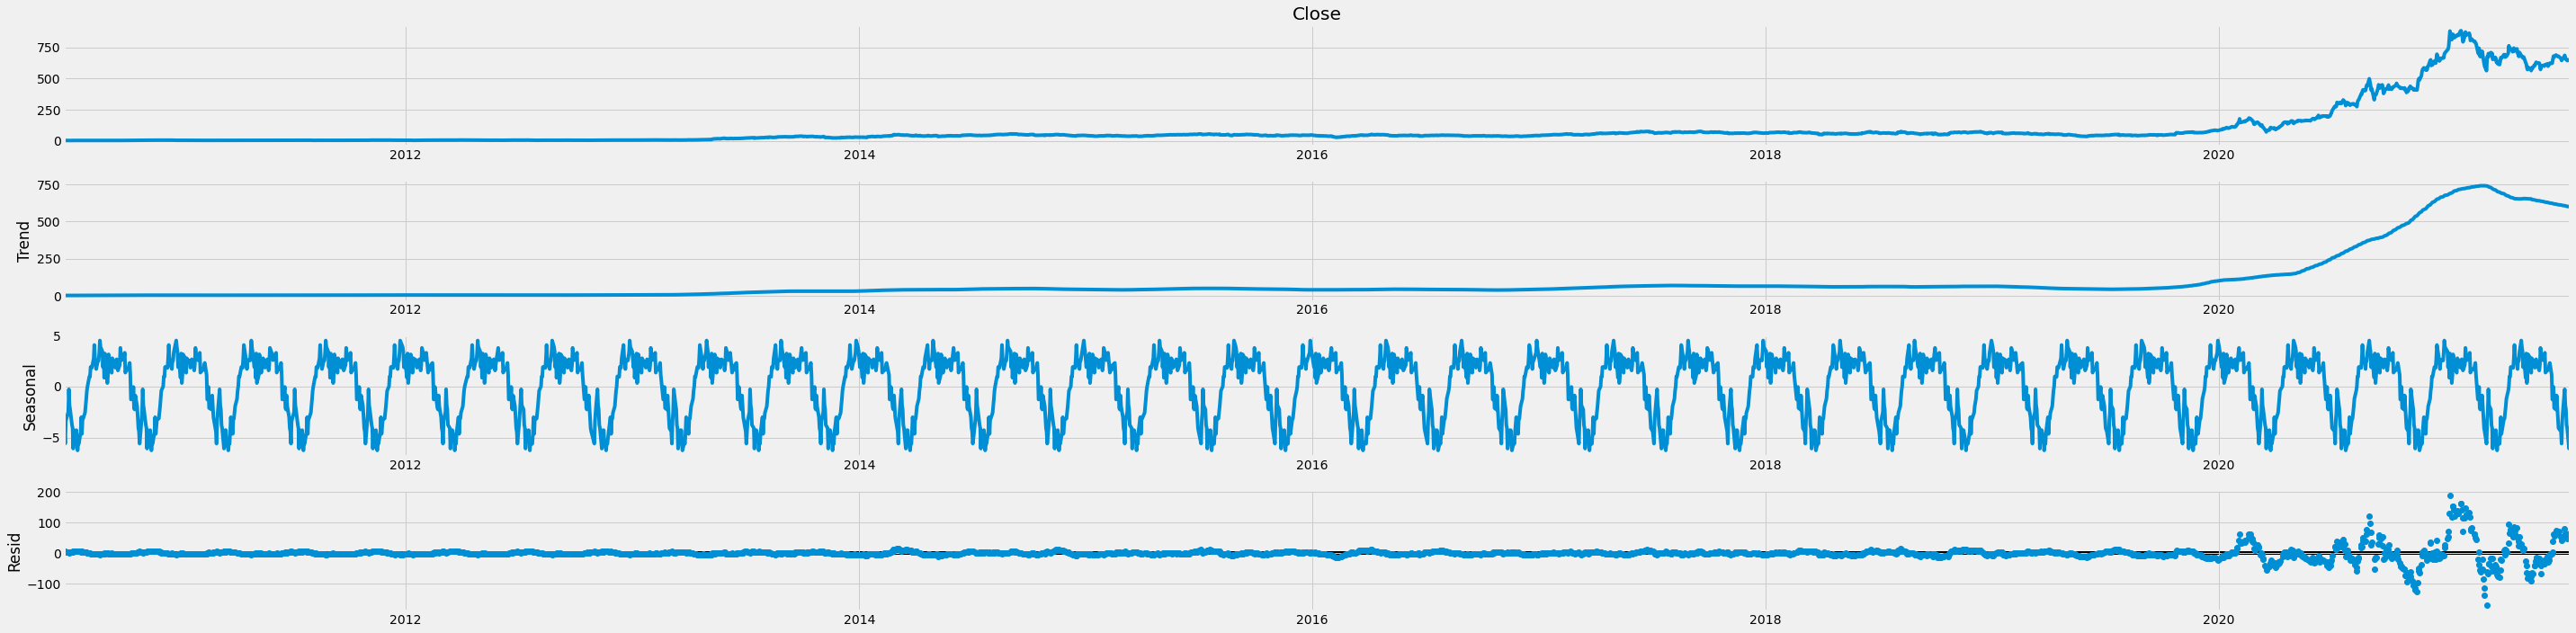

In [141]:
decomposition = sm.tsa.seasonal_decompose(tesla['Close'], model='additive', freq=7*4*3,extrapolate_trend='freq')
fig = decomposition.plot()
plt.show()

In [142]:
tesla_rc = pd.concat([decomposition.seasonal, decomposition.resid, decomposition.trend, decomposition.observed], axis=1)
tesla_rc.columns = ['seasonal', 'residual', 'trend', 'observation']
tesla_rc['total'] = tesla_rc['seasonal'] + tesla_rc['residual'] + tesla_rc['trend']
tesla_rc.head()

,seasonal,residual,trend,observation,total
Date,,,,,
2010-06-29,-4.060276,5.586953,3.251323,4.778,4.778
2010-06-30,-4.395862,5.891510,3.270352,4.766,4.766
2010-07-01,-5.574872,6.677491,3.289382,4.392,4.392
2010-07-02,-3.379229,3.910818,3.308411,3.840,3.840
2010-07-06,-2.491316,2.385874,3.327441,3.222,3.222


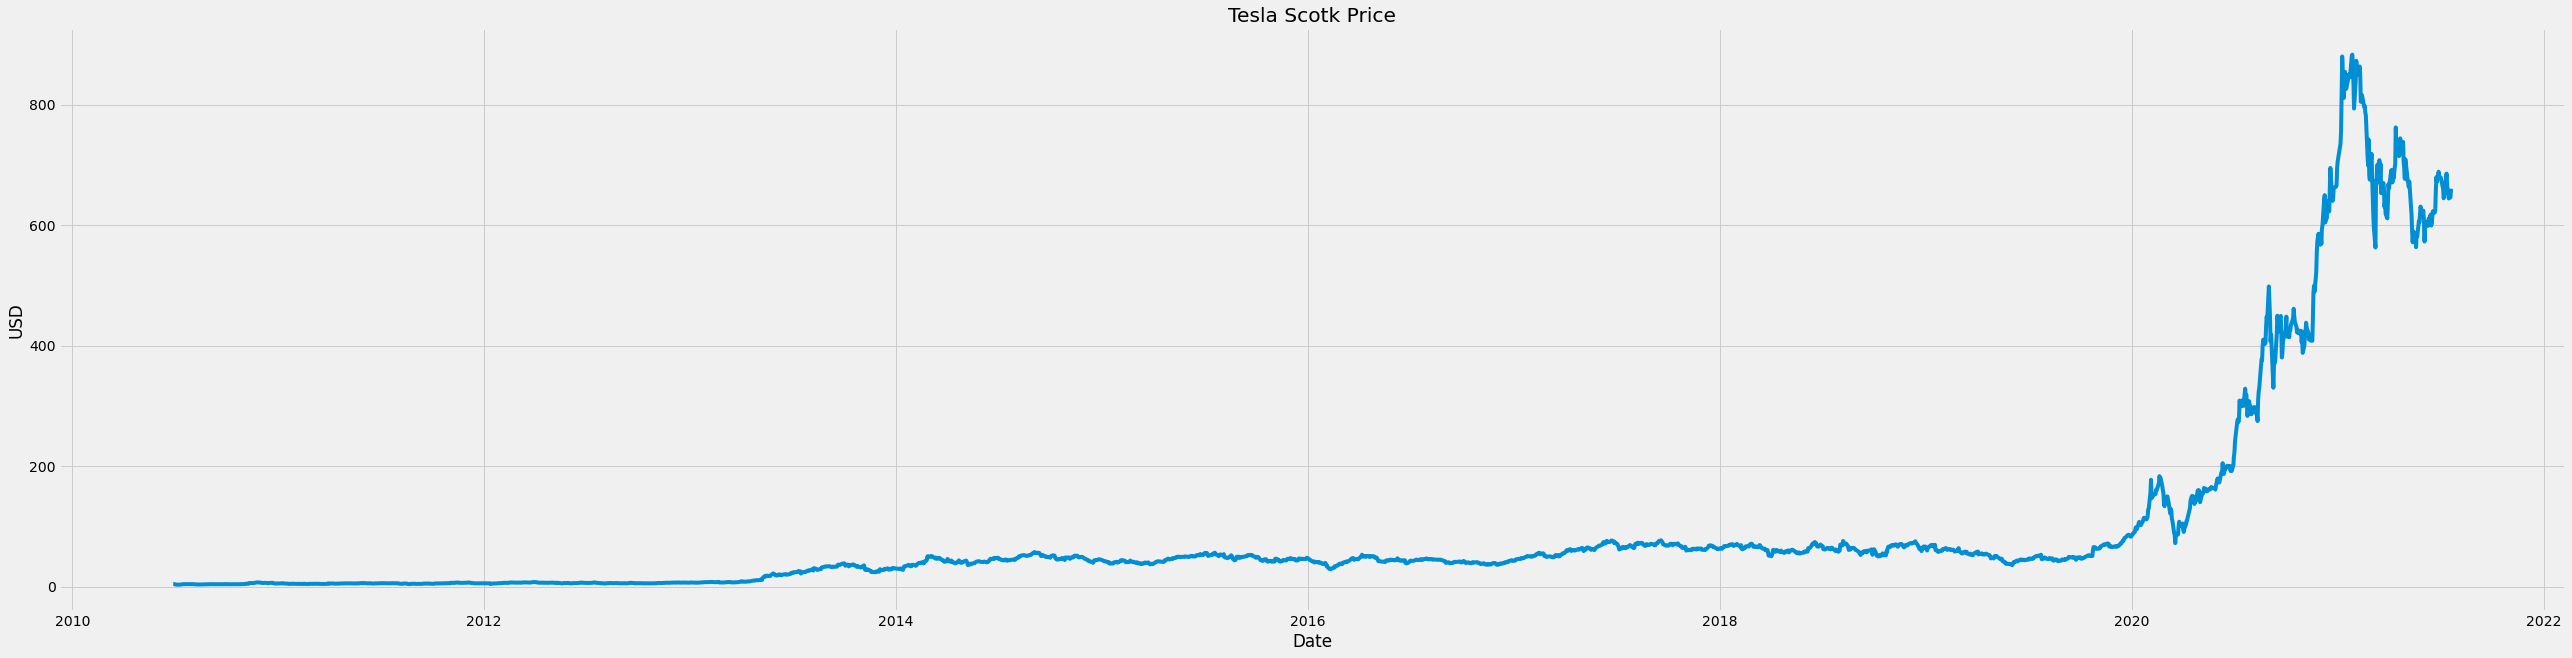

In [143]:
plot_df(tesla, tesla.index , tesla['Close'], title='Tesla Scotk Price',ylabel='USD')

In [144]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(tesla['Close'])
print(f"""
ADF Value : {adf_test[0]}
P Value : {adf_test[1]}
""")


ADF Value : 1.2319418969622373
P Value : 0.9961993094904104



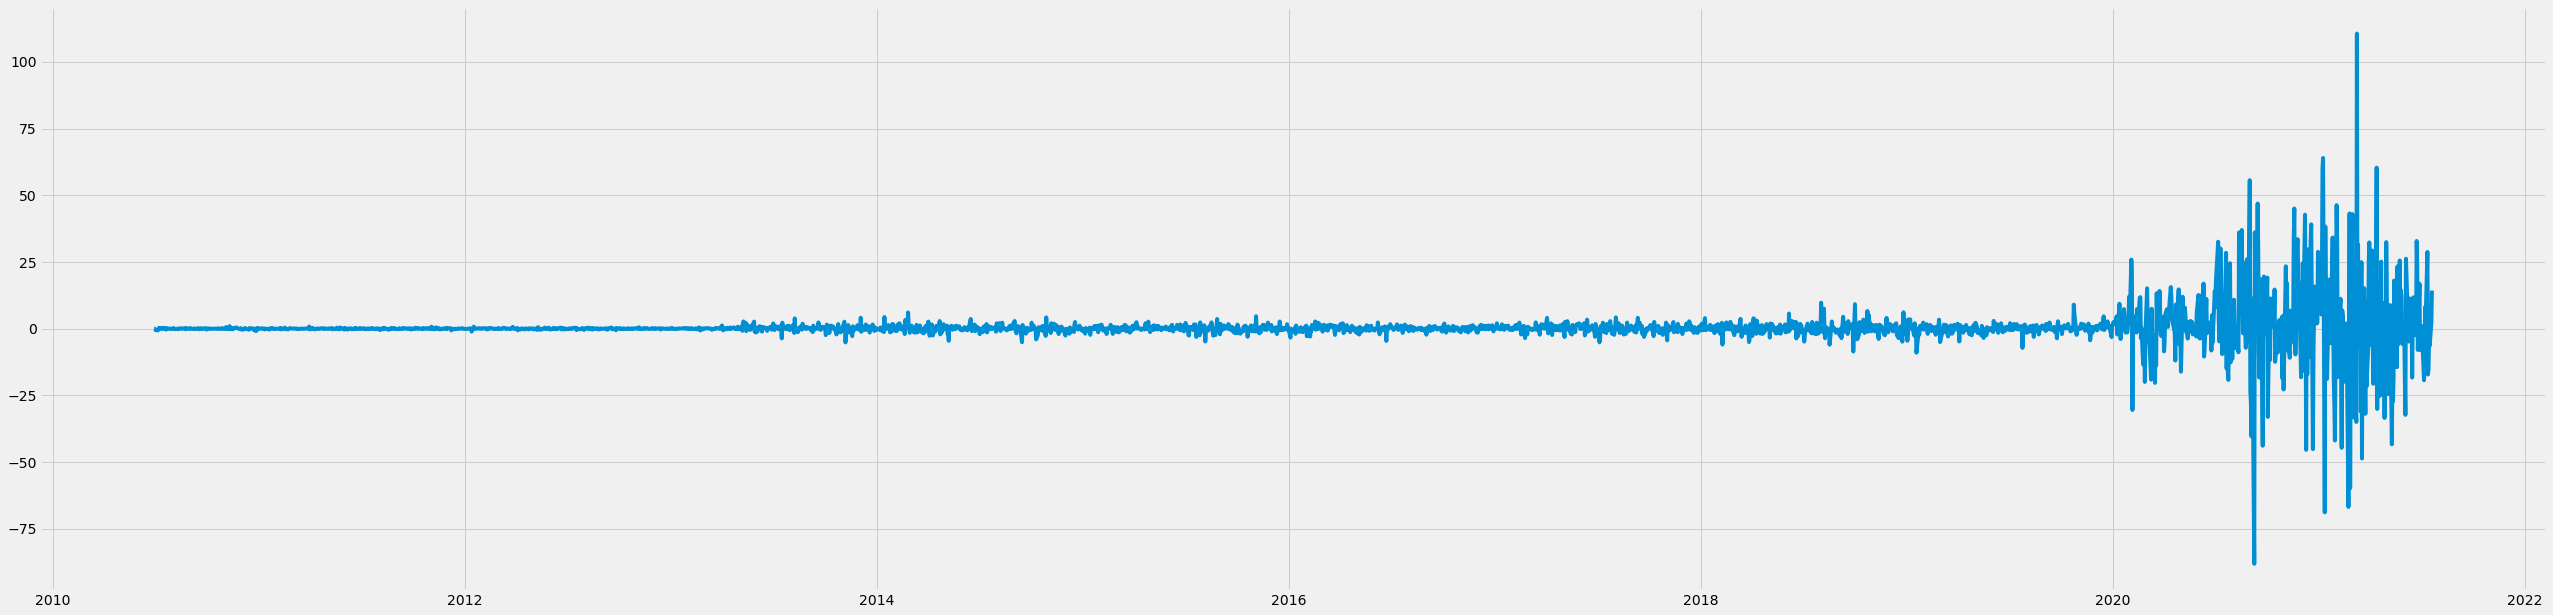

In [145]:
plt.plot(tesla['Close'].diff(1).fillna(0))

In [146]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(np.log(tesla['Close']).diff(1).fillna(0))
adf_test = adfuller((tesla['Close']).diff(1).fillna(0))
print(f"""
ADF Value : {adf_test[0]}
P Value : {adf_test[1]}
""")


ADF Value : -9.177185248047586
P Value : 2.303220877653622e-15



In [147]:
tesla_st = tesla.diff(1).fillna(0)
tesla_st.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-06-29,0.000,0.000,0.000,0.000,0.000,0.0
2010-06-30,-0.012,-0.012,1.084,1.152,1.358,-7896000.0
2010-07-01,-0.374,-0.374,-0.900,-0.606,-0.158,-44841500.0
2010-07-02,-0.552,-0.552,-0.564,-0.312,-0.400,-15395000.0
2010-07-06,-0.618,-0.618,-0.620,-0.576,-0.600,8635500.0


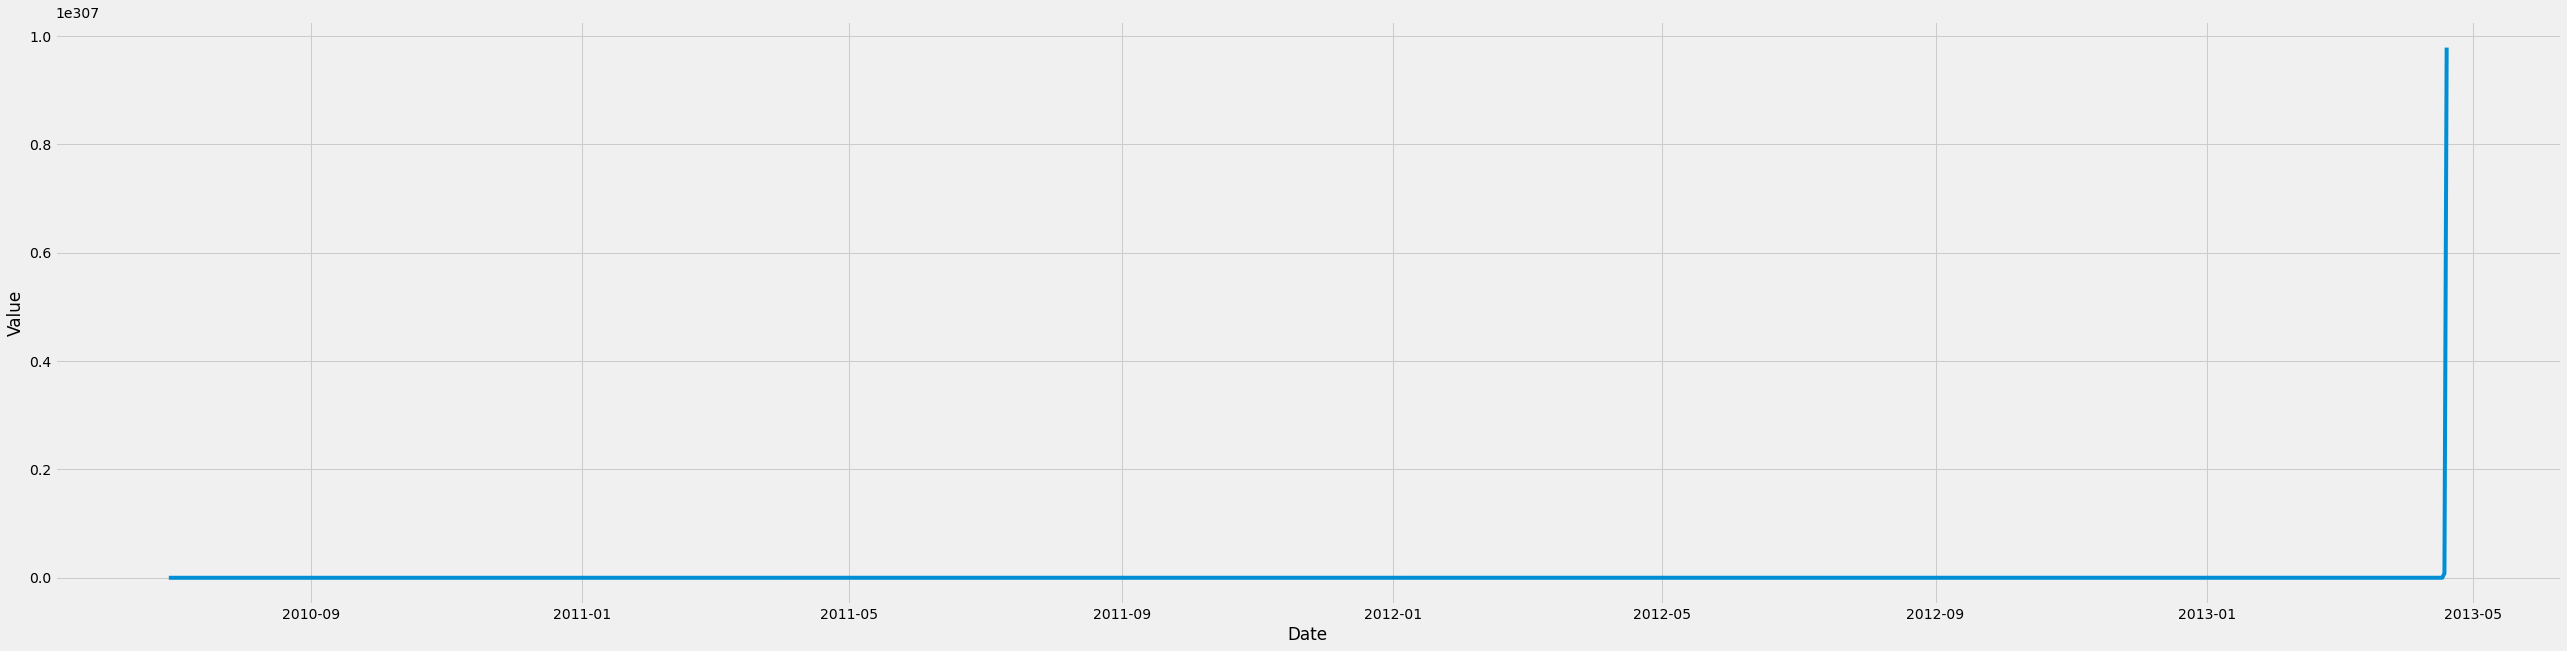

In [148]:
tesla_reconstruct = tesla_st.copy()
tesla_reconstruct = tesla_reconstruct.cumsum()
plot_df(tesla_reconstruct, tesla_reconstruct.index, tesla_reconstruct.cumsum().apply(np.exp)['Close'])

In [149]:
tesla_reconstruct = tesla_st.copy()
tesla_reconstruct.iloc[0,:] = tesla.iloc[0,:]
tesla_reconstruct = tesla_reconstruct.cumsum()

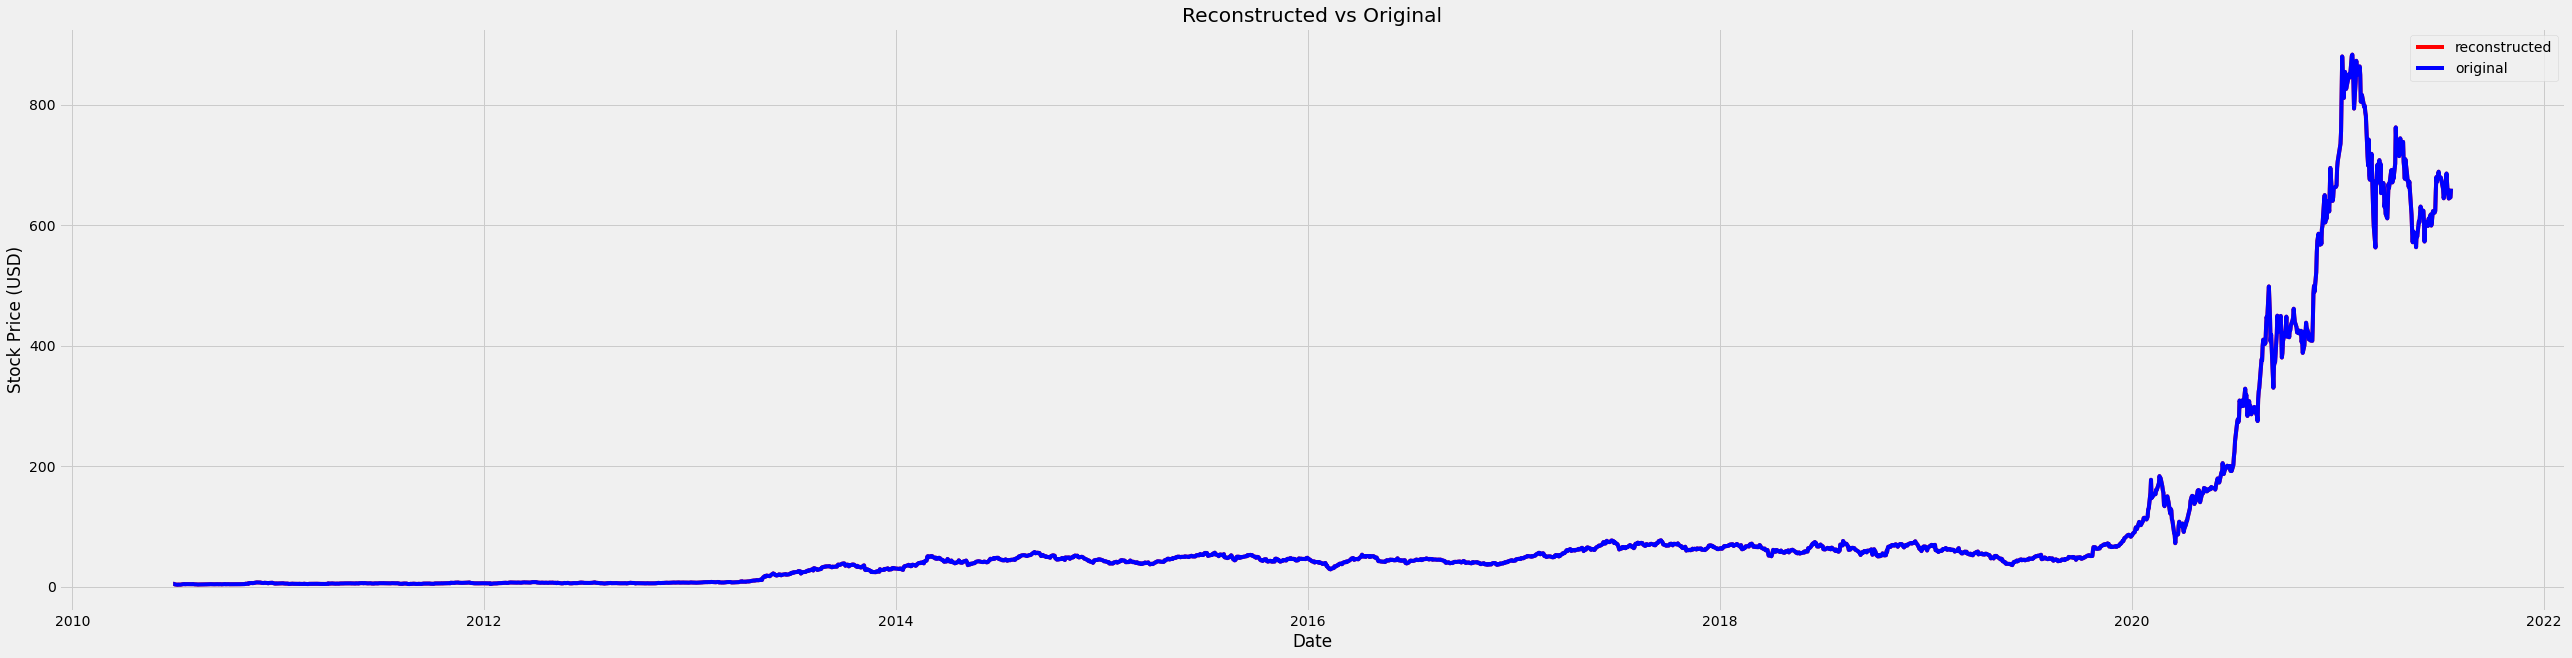

In [150]:
plt.plot(tesla.index, tesla_reconstruct['Close'], 'r-',  label='reconstructed')
plt.plot(tesla.index, tesla['Close'], 'b-', label = 'original')
plt.xlabel('Date'); plt.ylabel('Stock Price (USD)')
plt.title('Reconstructed vs Original')
plt.legend();

In [151]:
stepwise_fit = auto_arima(tesla_reconstruct['Close'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.90 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=21264.132, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=20362.268, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=19869.808, Time=0.13 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=19669.473, Time=0.19 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=19644.774, Time=0.23 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=19522.033, Time=0.34 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=1.08 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=1.22 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=19524.033, Time=0.63 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 5.097 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2784
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -9755.016
Date:                Sun, 08 Aug 2021   AIC                          19522.033
Time:                        11:31:38   BIC                          19557.619
Sample:                             0   HQIC                         19534.882
                               - 2784                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8935      0.006   -145.877      0.000      -0.906      -0.882
ar.L2         -0.7323      0.007   -102.320      0.000      -0.746      -0.718
ar.L3         -0.4867      0.008    -62.985      0.000      -0.502      -0.472
ar.L4         -0.2813      0.007    -39.210      0.000      -0.295      -0.267
ar.L5         -0.2097      0.005    -38.622      0.000      -0.220      -0.199
sigma2        65.0168      0.396    164.002      0.000      64.240      65.794
===================================================================================
Ljung-Box (L1) (Q):                   2.18   Jarque-Bera (JB):            266060.69
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):             412.26   Skew:                             0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        50.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [152]:
tesla_reconstruct.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-06-29,4.778,4.778,5.000,3.508,3.800,93831500.0
2010-06-30,4.766,4.766,6.084,4.660,5.158,85935500.0
2010-07-01,4.392,4.392,5.184,4.054,5.000,41094000.0
2010-07-02,3.840,3.840,4.620,3.742,4.600,25699000.0
2010-07-06,3.222,3.222,4.000,3.166,4.000,34334500.0


In [153]:
print('Shape of data',tesla_reconstruct.shape)

Shape of data (2784, 6)


In [154]:
print(tesla_reconstruct.shape)
train=tesla_reconstruct.iloc[:-115]
test=tesla_reconstruct.iloc[-115:]
print(train.shape,test.shape)

(2784, 6)
(2669, 6) (115, 6)


In [155]:
model=ARIMA(train['Close'], order= (5,2,0))
model= model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Close   No. Observations:                 2667
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -8709.208
Method:                       css-mle   S.D. of innovations              6.337
Date:                Sun, 08 Aug 2021   AIC                          17432.417
Time:                        11:32:10   BIC                          17473.638
Sample:                             2   HQIC                         17447.333
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0017      0.036      0.047      0.962      -0.069       0.072
ar.L1.D2.Close    -0.8613      0.019    -44.784      0.000      -0.899      -0.824
ar.L2.D2.Close    -0.7147      0.025    -28.354      0.000      -0.764      -0.665
ar.L3.D2.Close    -0.4745      0.028    -16.957      0.000      -0.529      -0.420
ar.L4.D2.Close    -0.2314      0.026     -8.851      0.000      -0.283      -0.180
ar.L5.D2.Close    -0.1241      0.020     -6.225      0.000      -0.163      -0.085
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5093           -1.4525j            1.5392           -0.1963
AR.2            0.5093           +1.4525j            1.5392            0.1963
AR.3           -1.4699           -0.0000j            1.4699           -0.5000
AR.4           -0.7068           -1.3469j            1.5211           -0.3269
AR.5           -0.7068           +1.3469j            1.5211            0.3269
-----------------------------------------------------------------------------
"""

In [156]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=tesla.index[start:end+1]
print(pred)

Date
2021-02-04     852.518257
2021-02-05     860.678577
2021-02-08     864.934646
2021-02-09     871.088797
2021-02-10     876.154321
                 ...     
2021-07-14    1336.761393
2021-07-15    1341.213108
2021-07-16    1345.666530
2021-07-19    1350.121661
2021-07-20    1354.578499
Length: 115, dtype: float64


<AxesSubplot:xlabel='Date'>

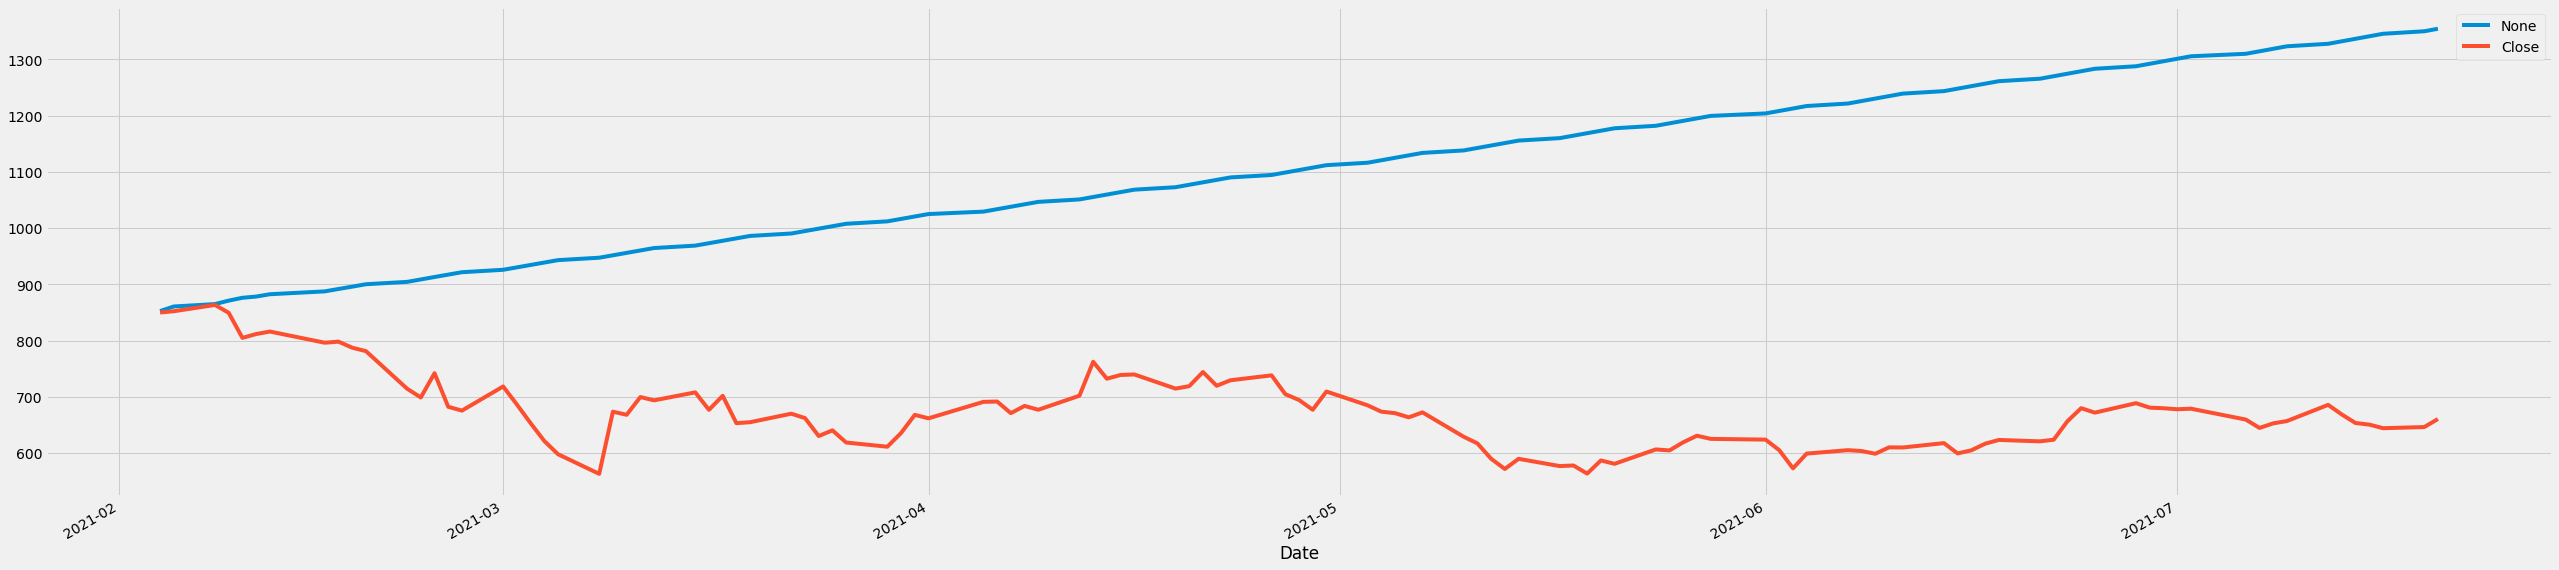

In [157]:
pred.plot(legend=True)
test['Close'].plot(legend=True)

##### <font color = blue> As you can see we saw upward trend only in the TESLA and our model predicted accordingly for remaining 115 days 
    
##### <font color = blue> and our prediction gone totally wrong as the stock changed the trend from upward to downward and sideward. The stock price is 
    
##### <font color = blue> depending on the so many parameters and we took in to consideration only the Closing price with respect to time  so we got such 
    
##### <font color = blue> difference in our projection. We must take care other parameters.
    
##### <font color = blue> So, learning from this project is,
    
##### <font color = blue> 1. We can build the model for sure but to enrich it we need more significant variables which are affacting the stock price, so same
    
##### <font color = blue> format can be used with more significant variables majority variables we can get from Yahoo finance with free or very little monthly fees.
    
##### <font color = blue> 2. We know that price is dynamic and it absorbs all the current events so, there must be 3 types of variables taken in to 
    
##### <font color = blue> consideration, Long term (Which we took in to consideration price movement, 200 days Moving average), Medium term (like bonus,
    
##### <font color = blue> dividend, Government overall policy for the sector, Conmany's order book, Management, Company's future plans and cliantage, Margins,
    
##### <font color = blue> Top line and Bottom line, ROE (Return on Equity), 50 days and 100 days Moving Averages. etc.) and Also short term (like volume, open 
    
##### <font color = blue> interest, market sentiment overall and for that perticular sector and company, P/E, Moving averages like 3 days, 9 days and 14 days)
      
##### <font color = blue> 3. This was our first try to analyze the price movement and it taught us a lot, like more you add the valuable input and more accuracy you achieve.
    
##### <font color = blue> 4. We shall also try other models like Neural Network which might be useful in short term prediction as it is trained to check the 
    
##### <font color = blue> previous day price and current day price difference  Delta and more the data it's pattern prediction capacity is high, so that is also a very good tool.
    

## <span style="color:purple">2- Predictive Analysis Using LSTM-RNN (Long Term Short Memory Model- Recurrent neural network)

Before we do anything, it is a good idea to fix the random number seed to ensure our results are reproducible.

### <span style="color:orange"> Fix Random Seed for reproducibilty

In [180]:
# fix random seed for reproducibility
numpy.random.seed(7)

### <span style="color:orange"> Loading the dataset 

In [181]:
# We can then extract the NumPy array from the dataframe and 
# convert the integer values to floating point values, which are more suitable for modeling with a neural network

# load the dataset
tesla = pd.read_csv('TSLA.csv', usecols=['Close'], engine='python')
dataset = tesla.values
dataset = dataset.astype('float32')

In [182]:
dataset

array([[ 23.89],
       [ 23.83],
       [ 21.96],
       ...,
       [640.81],
       [650.57],
       [780.  ]], dtype=float32)


The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. 

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [183]:
tesla.head(3)

,Close
0,23.889999
1,23.830000
2,21.959999


### <span style="color:orange"> Normalizing the dataset 

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It's great to rescale / normalize the data to the range of 0-to-1. It can be done using the MinMaxScaler preprocessing class from the scikit-learn library.

In [184]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

### <span style="color:orange"> Splitting dataset into Testing and Training

With time series data, the sequence of values is important. We can split the ordered dataset into train and test datasets. The code below calculates the index of the split point and separates the data into the training datasets with 80% of the observations, leaving the remaining 20% for testing the model.

We can modify the train- test percentage according to the result we obtain

In [264]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1932 484


In [265]:
train

array([[0.01058623],
       [0.01050772],
       [0.00806071],
       ...,
       [0.43861553],
       [0.42823866],
       [0.41236585]], dtype=float32)

### <span style="color:orange"> Converting an array of values into a dataset matrix

In [267]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
#         print('Loop:', i,i+look_back)
#         print('X',dataset[i:(i+look_back), 0])
#         print('Y',dataset[(i+look_back), 0])
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

The function takes two arguments: the dataset, which is a NumPy array that we want to convert into a dataset, and the look_back, which is the number of previous time steps to use as input variables to predict the next time period — in this case defaulted to 1.

This default will create a dataset where X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).

It can be configured, and we will by constructing a differently shaped dataset in the next section.

### <span style="color:orange"> Reshaping model 

In [268]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [269]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

### <span style="color:orange"> Create and fit LSTM Network

The network has a visible layer with 1 input, a hidden layer with 3 LSTM blocks or neurons, and an output layer that makes a single value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 100 epochs and a batch size of 32 is used.


In [285]:
model = Sequential()
model.add(LSTM(3, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=200, batch_size=7, verbose=1)


Epoch 1/200
276/276 [==============================] - 2s 1ms/step - loss: 0.0427 - accuracy: 3.5471e-04
Epoch 2/200
276/276 [==============================] - 0s 997us/step - loss: 0.0194 - accuracy: 2.6037e-04
Epoch 3/200
276/276 [==============================] - 0s 1ms/step - loss: 0.0137 - accuracy: 1.0932e-04
Epoch 4/200
276/276 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 1.2329e-04
Epoch 5/200
276/276 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 8.4897e-04
Epoch 6/200
276/276 [==============================] - 0s 1ms/step - loss: 2.3639e-04 - accuracy: 1.0021e-04
Epoch 7/200
276/276 [==============================] - 0s 1ms/step - loss: 7.2284e-05 - accuracy: 4.5207e-04
Epoch 8/200
276/276 [==============================] - 0s 1ms/step - loss: 6.0629e-05 - accuracy: 9.3482e-05
Epoch 9/200
276/276 [==============================] - 0s 1ms/step - loss: 6.1434e-05 - accuracy: 7.1403e-04
Epoch 10/200
276/276 [===============

Once the model is fit, we can estimate the performance of the model on the train and test datasets. Accuracy is meaningless in a regression problem,
The model fitting history (not shown here) shows a decreasing loss.

### <span style="color:orange"> Model accuracy evaluation

Let's evaluate now the model performance in the same training set, using the appropriate Keras built-in function

In [272]:
score=model.evaluate(trainX, trainY, verbose=0)
score

[4.16421789850574e-05, 0.0005181347369216383]

The exact contents of the score array depend on what exactly we have requested during model compilation; in our case here, the first element is the loss (MSE), and the second one is the "accuracy".
Usually accuracies are compared to a baseline accuracy of another (simple) algorithm, so that you can see whether the task is just very easy or your LSTM is very good.

The MSE(loss) is 4.16. There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another. This is low, but the model can do better by inclusing more data points and training it in different ways

### <span style="color:orange"> Making Predictions and Calculating root mean square

In [260]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 5.86 RMSE
Test Score: 11.35 RMSE


We can see that the model has an average error of about 6 stock closing prices (in thousands) on the training dataset, and about 11 stock closing prices (in thousands) on the test dataset, which is pretty good as average error is too low.

Lower values of RMSE indicate better fit.

### <span style="color:orange"> Visualizations and Plotting

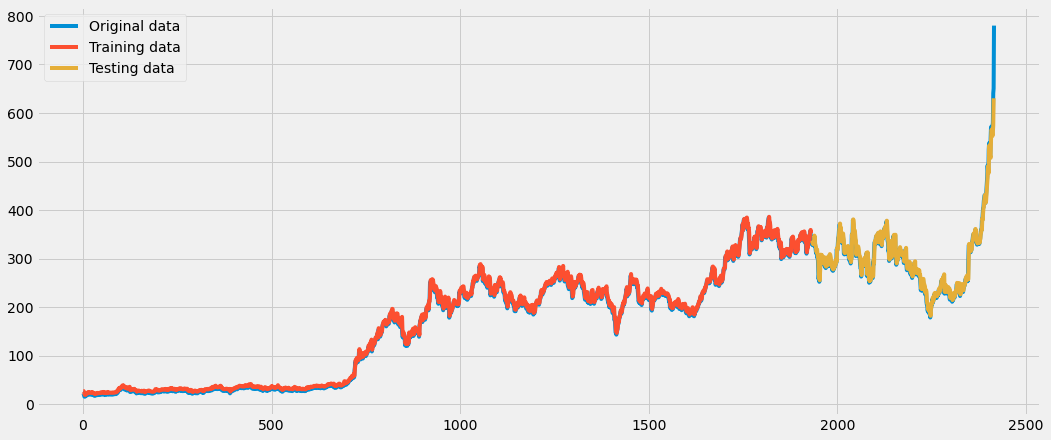

In [261]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(16, 7))
plt.plot(scaler.inverse_transform(dataset), label='Original data')
plt.plot(trainPredictPlot, label='Training data')
plt.plot(testPredictPlot, label='Testing data')

# plt.figure(figsize=(16, 7))
# plt.plot(scaled_dataset, label='Original data')
# plt.plot(sup, label='Training data')
# plt.plot(test_results, label='Testing data')
# plt.legend()
# plt.show()

plt.legend()
plt.show()

## We can deduce from the graph that LSTM model yields better prediction. ALso, from the actual error for ARIMA model was 19.39% of the actual value, whereas, the LSTM model had a lesser error rate as it had lesser loss and stable accuracy